# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Definition

The Dataset contains information about existing Family Grill House restaurant locations. Column specific details are given below.

- location      :- Discrete. Unique identifier for the restaurant.
- year_3_profit :- Nominal. 1 if profitable after 3 years, 0 otherwise.
- local_pop     :- Discrete. Population within 30 minutes of travel to the restaurant. Any positive integer.
- competitors   :- Discrete. Number of competitor restaurants within 2 kilometers. Any positive integer.
- nearest_fgh   :- Continuous. Distance in kilometers to the nearest other Family Grill House location. Any positive value.
- hours		    :- Ordinal. One of "Regular", "Extended", or "24 hours".
- highway		:- Discrete. Travel time in minutes to the nearest highway. Should be at least 1 minute.
- drivethru 	:- Ordinal. Whether the location has a drive-through order and collection service ("Yes" or "No").


**Tasks:**

1. _Identify which factors are most important in determining the profitability of a new location?_
2. _Given this data, predict whether the third year profits are positive with 75% accuracy?_

In [279]:
# Start coding here...
# Importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')

from sklearn import metrics
import statsmodels.api as stat_mod
from scipy.stats import pearsonr, randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

<Figure size 1000x800 with 0 Axes>

# Data Validation

### Importing the dataset and previewing the first 10 rows

In [116]:
df = pd.read_csv("restaurant_success.csv")
df.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
0,38195,1,125567.0,0.0,6.4,Extended,3,No
1,12324,1,105571.0,0.0,5.3,24 hours,16,Yes
2,79567,0,104591.0,0.0,6.3,NaN,6,No
3,41435,1,169028.0,0.0,6.0,Extended,5,Yes
4,24969,1,Unknown,0.0,4.5,Extended,4,No drivethru
5,38255,1,197654.0,0.0,7.6,NaN,5,Yes
6,26925,1,265647.0,0.0,7.2,24 hours,2,Yes
7,91321,1,131662.0,0.0,6.3,Extended,20,Yes
8,20900,1,175574.0,0.0,6.8,NaN,4,Yes
9,11136,1,22738.0,0.0,33.5,24 hours,11,Yes


#### Target Variable :- year_3_profit
#### Independent Variables :- location, local_pop, competitors, nearest_fgh, hours, highway, drivethru    

### Printing the shape and summary of the dataset

In [117]:
print(f"Shape of the dataframe: {df.shape}")
print("\n\n")
print("Information about the dataframe:")
df.info()

Shape of the dataframe: (1090, 8)



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1090 non-null   int64  
 1   year_3_profit  1090 non-null   int64  
 2   local_pop      1090 non-null   object 
 3   competitors    1090 non-null   float64
 4   nearest_fgh    1090 non-null   float64
 5   hours          981 non-null    object 
 6   highway        1090 non-null   int64  
 7   drivethru      1090 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 68.2+ KB


_The dataset contains 1090 rows and 8 columns_

### Checking for Duplicate Rows

In [118]:
df[df.duplicated()]

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru


_From the above output, it is evident that we do not have any duplicate rows in the dataset._

### Checking for Null Values 

In [119]:
print("Number of Null Values:")
print("")
print(df.isnull().sum())
print("\n\n")

print("Percentage of Null Values:")
print("")
print((df.isnull().sum()/ df.shape[0]) * 100 )

Number of Null Values:

location           0
year_3_profit      0
local_pop          0
competitors        0
nearest_fgh        0
hours            109
highway            0
drivethru          0
dtype: int64



Percentage of Null Values:

location          0.0
year_3_profit     0.0
local_pop         0.0
competitors       0.0
nearest_fgh       0.0
hours            10.0
highway           0.0
drivethru         0.0
dtype: float64


_Out of 1090 rows, 109 rows have null values in **hours** column. This is 10% of our dataset. Hence, the rows cannot be dropped and the null values of this column need to be imputed._

#### Finding out the count of unique values and mode of "hours" column

In [120]:
print("Count of unique values:")
print(df.hours.value_counts(dropna=False))
print("\n")

print(f"Mode: {df['hours'].mode()[0]}")

Count of unique values:
Extended    488
24 hours    307
Regular     186
NaN         109
Name: hours, dtype: int64


Mode: Extended


#### Imputing the missing values with Mode

_To impute the Missing values in **hours** column, we can use **"Simple Imputer"** technique._

In [121]:
# Replacing the null values with the most frequent value of the column. 

s_impute = SimpleImputer(strategy='most_frequent')
df['hours'] = s_impute.fit_transform(df[['hours']])
df.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
0,38195,1,125567.0,0.0,6.4,Extended,3,No
1,12324,1,105571.0,0.0,5.3,24 hours,16,Yes
2,79567,0,104591.0,0.0,6.3,Extended,6,No
3,41435,1,169028.0,0.0,6.0,Extended,5,Yes
4,24969,1,Unknown,0.0,4.5,Extended,4,No drivethru
5,38255,1,197654.0,0.0,7.6,Extended,5,Yes
6,26925,1,265647.0,0.0,7.2,24 hours,2,Yes
7,91321,1,131662.0,0.0,6.3,Extended,20,Yes
8,20900,1,175574.0,0.0,6.8,Extended,4,Yes
9,11136,1,22738.0,0.0,33.5,24 hours,11,Yes


In [122]:
print(f'Null Values in "hours" column: {df.hours.isnull().sum()}')
print("\n")
print("Count of unique values:")
print(df.hours.value_counts(dropna=False))

Null Values in "hours" column: 0


Count of unique values:
Extended    597
24 hours    307
Regular     186
Name: hours, dtype: int64


**Validating "location" column**

_"location" column holds Discrete values and acts as unique identifier for the restaurant._


In [123]:
print("Checking for null values:")
print(df['location'].isnull().sum())

Checking for null values:
0


In [124]:
print("Duplicate Rows in 'Location' column:")
df[df.duplicated(subset = ['location'])]

Duplicate Rows in 'Location' column:


,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru


_Since all the values in the **location** column are unique and there are no null values, they are as per the data description. Hence, no cleaning needed._

#### Unique values in "local_pop" column

In [125]:
df.local_pop.value_counts(dropna= False)

Unknown     54
125567.0     1
118510.0     1
89372.0      1
116334.0     1
            ..
46986.0      1
224420.0     1
274222.0     1
139306.0     1
157215.0     1
Name: local_pop, Length: 1037, dtype: int64

_We are having 54 rows with value as **"Unknown"** which is wrong. Hence, these rows are to be **imputed with the mean of column**._

_Since the datatype of column is object because of 'Unknown' entry, we should first replace these values with null, convert to numeric datatype and calculate the mean._

In [126]:
df['local_pop'] = df['local_pop'].replace("Unknown", np.nan)
df['local_pop'] = pd.to_numeric(df['local_pop'])
local_pop_mean = round(df.local_pop.mean())
print(f"Mean of 'local_pop' column: {local_pop_mean}")

Mean of 'local_pop' column: 153472


**Imputing the null values in "local_pop" column with Mean**

In [127]:
df['local_pop'].fillna(local_pop_mean, inplace = True)

In [128]:
print(f'Null Values in "local_pop" column: {df.local_pop.isnull().sum()}')

Null Values in "local_pop" column: 0


In [129]:
df.local_pop.value_counts(dropna= False)

153472.0    54
125567.0     1
118510.0     1
89372.0      1
116334.0     1
            ..
46986.0      1
224420.0     1
274222.0     1
139306.0     1
157215.0     1
Name: local_pop, Length: 1037, dtype: int64

#### Validating "competitors" column

In [130]:
df['competitors'].value_counts(dropna = False)

0.0    986
1.0    104
Name: competitors, dtype: int64

In [131]:
print(f"Null values in 'competitors' column: {df['competitors'].isnull().sum()}")

Null values in 'competitors' column: 0


_There are no missing values in **competitors** column, and the values are as per the description. Hence, no cleaning required._

**Validating "nearest_fgh" column**

In [132]:
print("Unique values and their count:")
print(df['nearest_fgh'].value_counts(dropna = False))
print("\n\n")
print("Null Values in the column: ")
print(df['nearest_fgh'].isnull().sum())

Unique values and their count:
5.3     42
6.3     31
4.6     31
4.7     30
5.5     29
        ..
22.2     1
12.5     1
23.9     1
19.2     1
14.4     1
Name: nearest_fgh, Length: 153, dtype: int64



Null Values in the column: 
0


_There are no missing values in **nearest_fgh** column, and the values are as per the description. Hence, no cleaning required._

**Validating "highway" column**

_Highway column must be Discrete and should be at least 1 minute._

In [133]:
df[df['highway'] < 1]

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
352,97893,1,24060.0,0.0,5.8,Extended,-24,No
710,84870,1,189592.0,0.0,6.2,24 hours,-1,Yes


_We see that there are 2 rows which are **inconsistent** with the expected values in the column. Since the dataset is small, we cannot drop any row._

_Instead, assuming that these were typo, we can **convert these values to its positive values**, i.e "24" and "1"_

In [134]:
df.loc[ df['highway'] == -1, 'highway'] = 1
df.loc[ df['highway'] == -24, 'highway'] = 24
df[df['highway'] < 1]

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru


In [135]:
df.iloc[[352, 710]]

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
352,97893,1,24060.0,0.0,5.8,Extended,24,No
710,84870,1,189592.0,0.0,6.2,24 hours,1,Yes


**Validating "drivethru" column**

_"drivethru" column is Ordinal and will have "Yes" or "No"_

In [136]:
df['drivethru'].value_counts(dropna = False)

Yes             566
No              470
No drivethru     54
Name: drivethru, dtype: int64

_There are **54 rows** in the dataset which has value as "No drivethru". We can **replace these rows with "No"** since they essentially mean the same thing._

In [137]:
df.loc[df['drivethru'] == 'No drivethru', 'drivethru'] = 'No'

In [138]:
df['drivethru'].value_counts(dropna = False)

Yes    566
No     524
Name: drivethru, dtype: int64

#### Validating "year_3_profit" column.

_"year_3_profit" column is Nominal, 1 if profitable after 3 years, 0 otherwise._

In [139]:
print("Unique values in the column:")
df['year_3_profit'].unique()

Unique values in the column:


array([1, 0])

In [140]:
print("Checking for null values:")
print(df['year_3_profit'].isnull().sum())

Checking for null values:
0


_The target variable **"year_3_profit"** is as per the description and there are no null records. Hence, no cleaning is needed._

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1090 non-null   int64  
 1   year_3_profit  1090 non-null   int64  
 2   local_pop      1090 non-null   float64
 3   competitors    1090 non-null   float64
 4   nearest_fgh    1090 non-null   float64
 5   hours          1090 non-null   object 
 6   highway        1090 non-null   int64  
 7   drivethru      1090 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 68.2+ KB


# EDA

## Summary Statistics

In [142]:
# Checking 15th, 20th, 25th, 50th, 75th and 90th percentile of numeric columns using .describe() method

numeric_cols = ['year_3_profit','local_pop', 'competitors', 'nearest_fgh','highway']
df[numeric_cols].describe(percentiles = [0.15, 0.2 ,0.25, 0.5, 0.75, 0.9])

,year_3_profit,local_pop,competitors,nearest_fgh,highway
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,0.834862,153471.888073,0.095413,7.886789,15.055046
std,0.371475,80784.351996,0.293919,7.196412,8.425697
min,0.000000,10044.000000,0.000000,4.000000,1.000000
15%,0.000000,57610.900000,0.000000,4.700000,5.000000
20%,1.000000,69782.200000,0.000000,4.900000,6.000000
25%,1.000000,88189.250000,0.000000,5.100000,7.250000
50%,1.000000,153472.000000,0.000000,6.200000,15.000000
75%,1.000000,222588.000000,0.000000,7.400000,22.000000
90%,1.000000,268637.400000,0.000000,11.600000,27.000000


#### Finding out the percentage of restaurants that are profitable.

In [143]:
df['year_3_profit'].value_counts(normalize = True)

1    0.834862
0    0.165138
Name: year_3_profit, dtype: float64

In [144]:
df.groupby(['year_3_profit']).mean()

,location,local_pop,competitors,nearest_fgh,highway
year_3_profit,,,,,
0,51474.722222,133032.833333,0.083333,9.097222,13.500000
1,55453.541758,157514.778022,0.097802,7.647363,15.362637


## Observations

- About 83% of restaurants are profitable.  

- Restaurants having higher local population are profitable. 

- The average travel time from the nearest highway to FGH restaurant is 15 minutes, with minimum being 1 minute and maximum travel time being 29 mins. 

- FGH restaurants closer to each other are profitable. 

- More than 90% of the restaurants do not have any competitors within 2kms radius.

- Surprisingly, profitable restaurants are far from highway compared to those which are not-profitable. 

In [145]:
# Checking the stats of categorical columns

df.describe(include='object')

,hours,drivethru
count,1090,1090
unique,3,2
top,Extended,Yes
freq,597,566


#### Performing crosstab on the two categorical columns to check the relationship

In [146]:
# Cross tabulation on drivethru and year_3_profit

pd.crosstab(df['drivethru'], df['year_3_profit'])

year_3_profit,0,1
drivethru,,
No,104,420
Yes,76,490


In [147]:
pd.crosstab(df['drivethru'], df['year_3_profit'], normalize= 'all')

year_3_profit,0,1
drivethru,,
No,0.095413,0.385321
Yes,0.069725,0.449541


_About 45% of the restaurants have drivethru service and are **profitable** , whereas 38% of them are still profitable without drivethru option_

In [148]:
# Cross tabulation on service hours and year_3_profit

pd.crosstab(df['hours'], df['year_3_profit'], normalize= True)

year_3_profit,0,1
hours,,
24 hours,0.038532,0.243119
Extended,0.089908,0.457798
Regular,0.036697,0.133945


In [149]:
# Taking count of profitable and non-profitable restaurants based on service hours

loss_24hrs = df[(df['hours'] == '24 hours') & (df['year_3_profit'] == 0)].shape[0]
profit_24hrs = df[(df['hours'] == '24 hours') & (df['year_3_profit'] == 1)].shape[0]

loss_extended = df[(df['hours'] == 'Extended') & (df['year_3_profit'] == 0)].shape[0]
profit_extended = df[(df['hours'] == 'Extended') & (df['year_3_profit'] == 1)].shape[0]

loss_regular = df[(df['hours'] == 'Regular') & (df['year_3_profit'] == 0)].shape[0]
profit_regular = df[(df['hours'] == 'Regular') & (df['year_3_profit'] == 1)].shape[0]


In [150]:
print(f"Percentage of '24 hours' service restaurants that are profitable: {round((profit_24hrs / (profit_24hrs + loss_24hrs)) * 100, 2)}")

print(f"Percentage of 'Extended' service restaurants that are  profitable: {round((profit_extended / (profit_extended + loss_extended)) * 100, 2)}")

print(f"Percentage of 'Regular' service restaurants that are  profitable: {round((profit_regular / (profit_regular + loss_regular)) * 100, 2)}")

Percentage of '24 hours' service restaurants that are profitable: 86.32
Percentage of 'Extended' service restaurants that are  profitable: 83.58
Percentage of 'Regular' service restaurants that are  profitable: 78.49


In [151]:
df.groupby(['hours'])['year_3_profit'].mean()

hours
24 hours    0.863192
Extended    0.835846
Regular     0.784946
Name: year_3_profit, dtype: float64

- _From the above statistics, it is clear that restaurants open for "24 hours" are more profitable compared restaurants with "Extended" and "Regular" service hours._

- _However, all 3 types of restaurant service hours have almost similar performance when compared against profitability. The franchise aims towards having 24-hours service._

#### Calculating the percentage of drive-through service

_Nearly 52% of the locations have drive through option and 48% of them don't. The franchise is aiming towards having a drive-through service_

In [152]:
df['drivethru'].value_counts(normalize = True)

Yes    0.519266
No     0.480734
Name: drivethru, dtype: float64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1090 non-null   int64  
 1   year_3_profit  1090 non-null   int64  
 2   local_pop      1090 non-null   float64
 3   competitors    1090 non-null   float64
 4   nearest_fgh    1090 non-null   float64
 5   hours          1090 non-null   object 
 6   highway        1090 non-null   int64  
 7   drivethru      1090 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 68.2+ KB


## Univariate Analysis

- ### year_3_profit

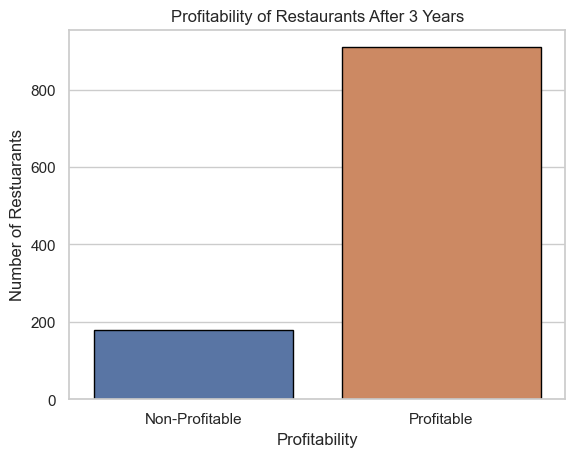

In [154]:
sns.countplot(x='year_3_profit', data=df, edgecolor='black')
plt.title('Profitability of Restaurants After 3 Years')
plt.xlabel('Profitability')
plt.ylabel('Number of Restuarants')
plt.xticks([0, 1], ['Non-Profitable', 'Profitable'])
plt.show()

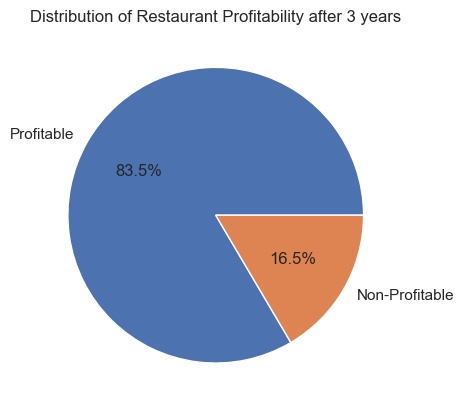

In [155]:
plt.pie(df['year_3_profit'].value_counts(), labels = ['Profitable','Non-Profitable'], autopct='%1.1f%%')
plt.title('Distribution of Restaurant Profitability after 3 years')
plt.show()

- _From the distribution we see, 83.5% of the restaurants are profitable in the shared data set._
- _There is class imbalance in the dataset and this will affect the model's predictive power if suitable measures are not taken._

- ### nearest_fgh

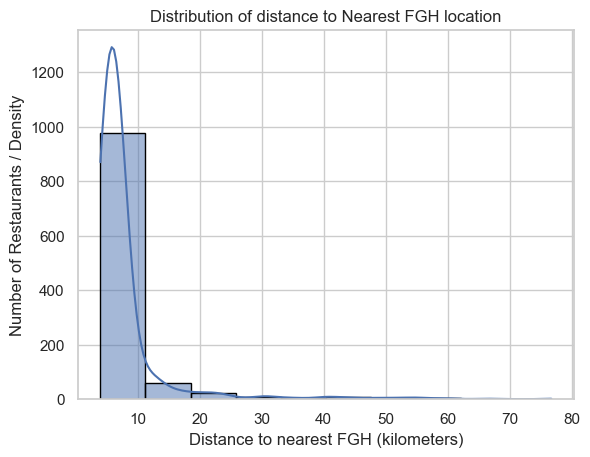

In [156]:
sns.histplot( data = df, x = 'nearest_fgh', kde = True , edgecolor = 'black', bins = 10)
plt.title('Distribution of distance to Nearest FGH location')
plt.xlabel('Distance to nearest FGH (kilometers)')
plt.ylabel('Number of Restaurants / Density')
plt.show()

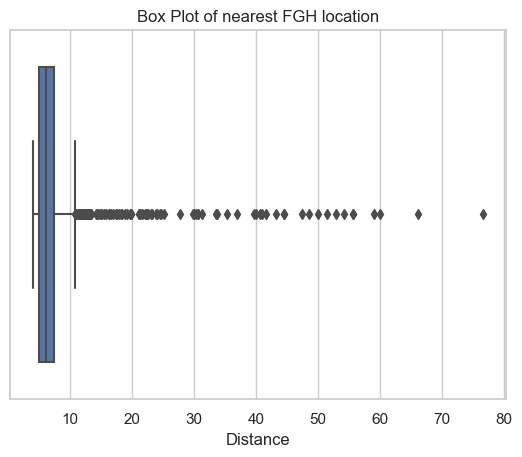

In [157]:
sns.boxplot(data= df, x = 'nearest_fgh')
plt.title('Box Plot of nearest FGH location')
plt.xlabel('Distance')
plt.show()

- _The distribution of "nearest_fgh" reveals that it is right skewed and is not normal._

- _There are a lot of outliers in the column which can affect the model's prediction if not treated correctly._

- ### local_pop

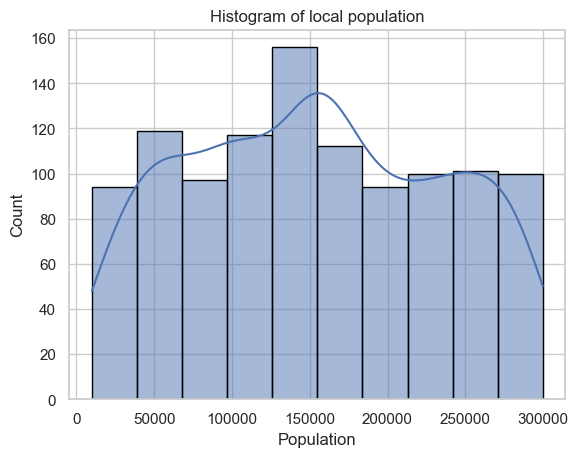

In [158]:
sns.histplot( data = df, x = 'local_pop', kde = True , edgecolor = 'black', bins = 10)
plt.title('Histogram of local population')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

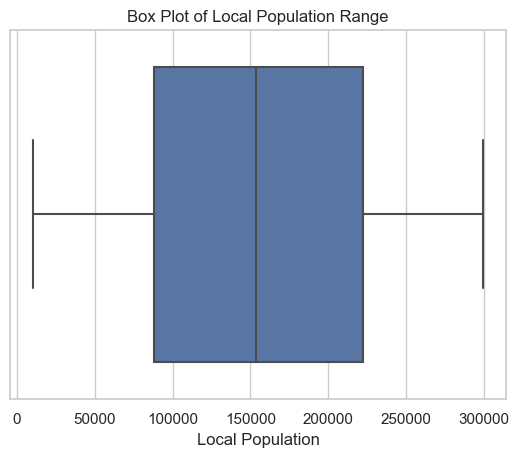

In [159]:
sns.boxplot(x='local_pop', data=df)
plt.title('Box Plot of Local Population Range')
plt.xlabel('Local Population')
plt.show()

- _The distribution of Local population is almost symmetric which is evident in both Box plot and Histplot._

- ### hours

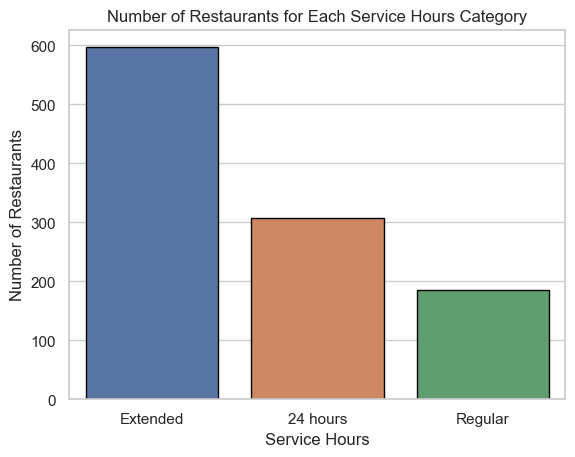

In [160]:
sns.countplot(x='hours', data=df, edgecolor='black')
plt.title('Number of Restaurants for Each Service Hours Category')
plt.xlabel('Service Hours')
plt.ylabel('Number of Restaurants')
plt.show()

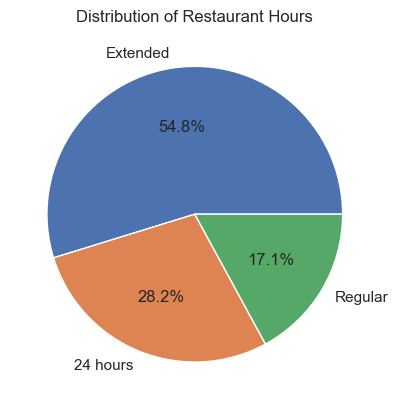

In [161]:
plt.pie(df['hours'].value_counts(), labels=df['hours'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Restaurant Hours')
plt.show()

- _About 54.8% of the restaurants have "Extended" service hours. But this could be because, the null values of the column were replaced with Mode of the column, i.e "Extended"_

- ### Competitors

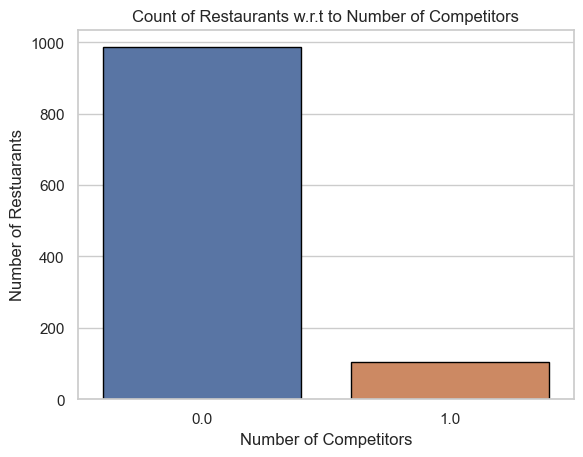

In [162]:
sns.countplot(x='competitors', data=df, edgecolor='black')
plt.title('Count of Restaurants w.r.t to Number of Competitors')
plt.xlabel('Number of Competitors')
plt.ylabel('Number of Restuarants')
plt.show()

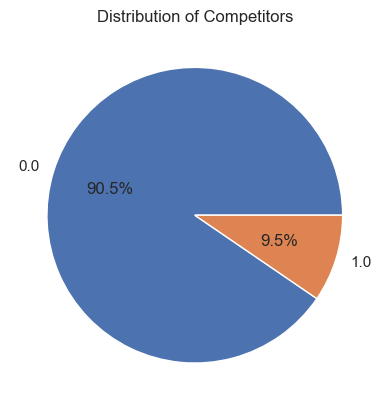

In [163]:
plt.pie(df['competitors'].value_counts(), labels=df['competitors'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Competitors')
plt.show()

- _From the pie chart, we see that nearly 91% of FGH restaurants do not have any competitors in their 2KM radius._

- ### drivethru

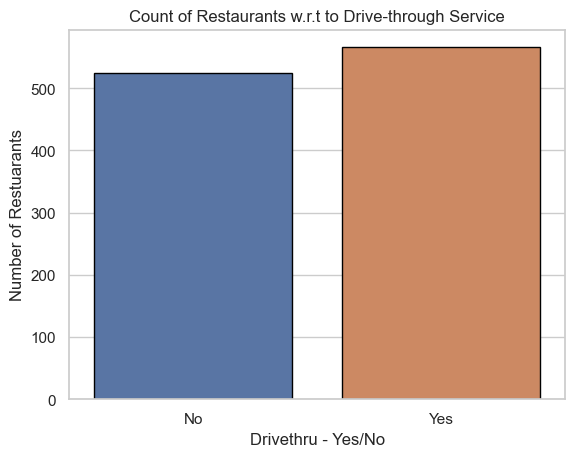

In [164]:
sns.countplot(x='drivethru', data=df, edgecolor='black')
plt.title('Count of Restaurants w.r.t to Drive-through Service')
plt.xlabel('Drivethru - Yes/No')
plt.ylabel('Number of Restuarants')
plt.show()

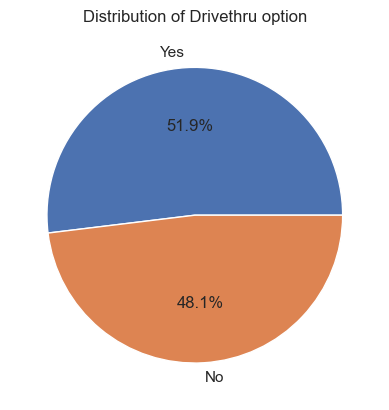

In [165]:
plt.pie(df['drivethru'].value_counts(), labels=df['drivethru'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Drivethru option')
plt.show()

- ### highway

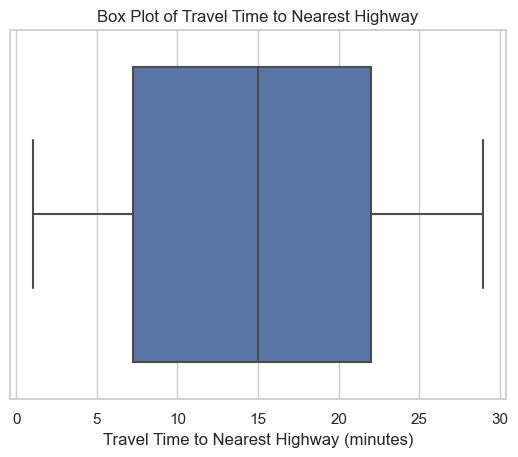

In [166]:
sns.boxplot(x='highway', data=df)
plt.title('Box Plot of Travel Time to Nearest Highway')
plt.xlabel('Travel Time to Nearest Highway (minutes)')
plt.show()

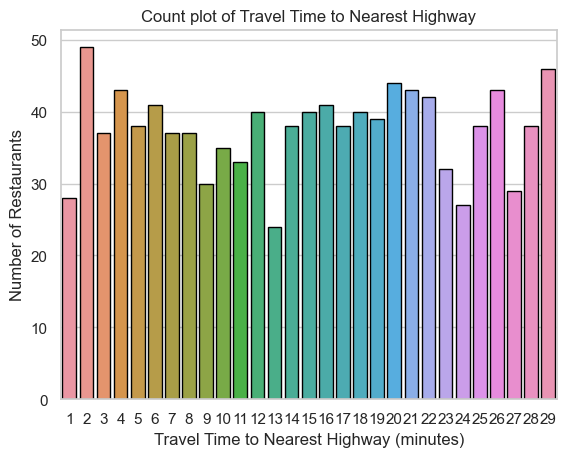

In [167]:
sns.countplot(x='highway', data=df, edgecolor='black')
plt.title('Count plot of Travel Time to Nearest Highway')
plt.xlabel('Travel Time to Nearest Highway (minutes)')
plt.ylabel('Number of Restaurants')
plt.show()

### Bi-variate Analysis

#### Correlation Matrix

In [168]:
corr_matrix = df[['local_pop','nearest_fgh','highway','competitors']].corr()
corr_matrix

,local_pop,nearest_fgh,highway,competitors
local_pop,1.000000,-0.432306,0.003231,0.042533
nearest_fgh,-0.432306,1.000000,-0.000650,0.009062
highway,0.003231,-0.000650,1.000000,0.018271
competitors,0.042533,0.009062,0.018271,1.000000


<AxesSubplot: >

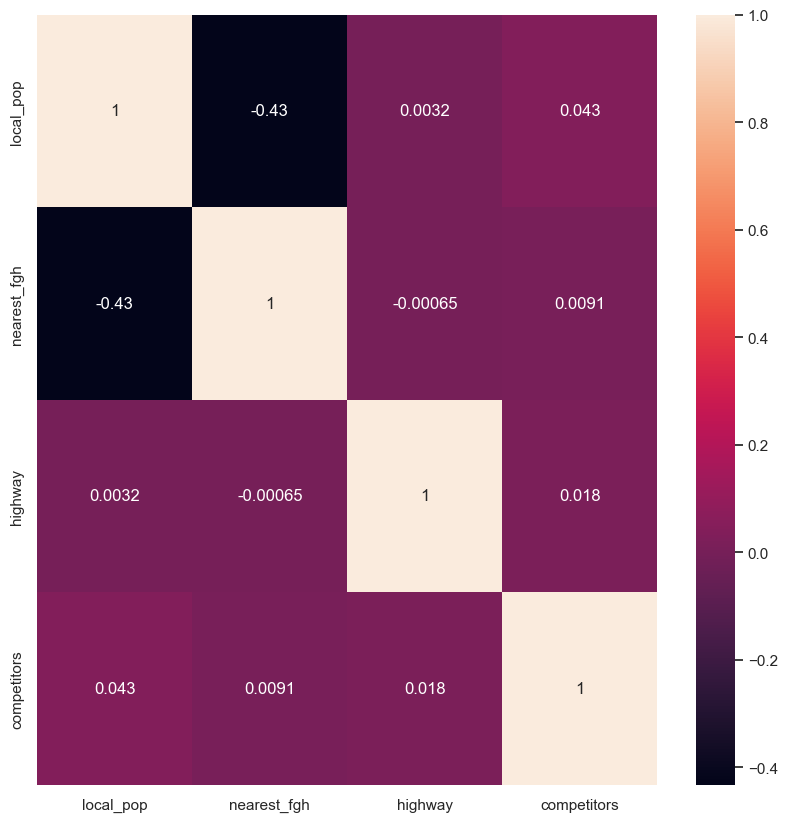

In [169]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True)

- _From the correlation matrix, we see a moderate **negative correlation** between **"nearest_fgh"** column and **"local_pop"** column._

- _As the local population increases, FGH restaurants are located closer to each other which makes sense because restaurant cluster can be setup to cater the high population density_

In [170]:
# Calculating the correlation co-efficient between local_pop and nearest_fgh

correlation_coefficient, p_value = pearsonr(df['local_pop'], df['nearest_fgh'])

print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

Correlation Coefficient: -0.43
P-value: 0.0000


- _Since p-value is less than 0.05, we can say that local_pop and nearest_fgh have statistically significant correlation._

In [171]:
# Grouping based on profitability and taking mean of numerical columns

df.groupby(['year_3_profit']).agg('mean')[['local_pop','nearest_fgh','highway','competitors']].round(2)

,local_pop,nearest_fgh,highway,competitors
year_3_profit,,,,
0,133032.83,9.10,13.50,0.08
1,157514.78,7.65,15.36,0.10


_We can see below observations here:_
- _The average local population of profitable restaurants is more compared to not-profitable._
- _Profitable restaurants on average seem to be closer to other FGH locations compared to not-profitable._
- _Profitable restaurants on average have longer travel time to their nearest highway._

#### Local Population vs Nearest FGH

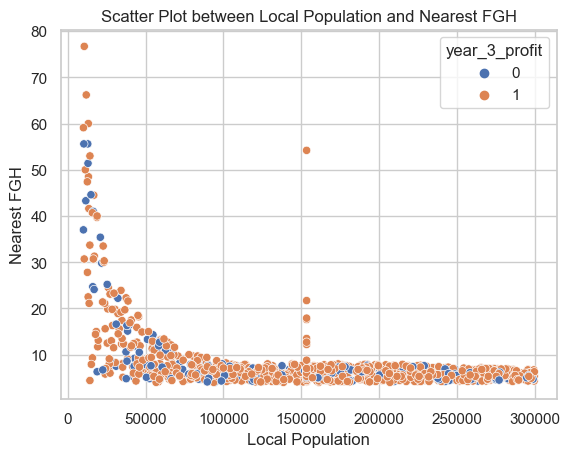

In [172]:
sns.scatterplot(data=df, x='local_pop', y='nearest_fgh', hue='year_3_profit')
plt.title('Scatter Plot between Local Population and Nearest FGH')
plt.xlabel('Local Population')
plt.ylabel('Nearest FGH')
plt.show()

- _As the local population increases, FGH restaurants are closer to each other. This aligns with our correlation matrix observation mentioned above._
- _The locations having less than 50000 local population and FGH restaurants that are distant from each other have less number of profitable _restaurants.__


#### Local Population vs Profitability

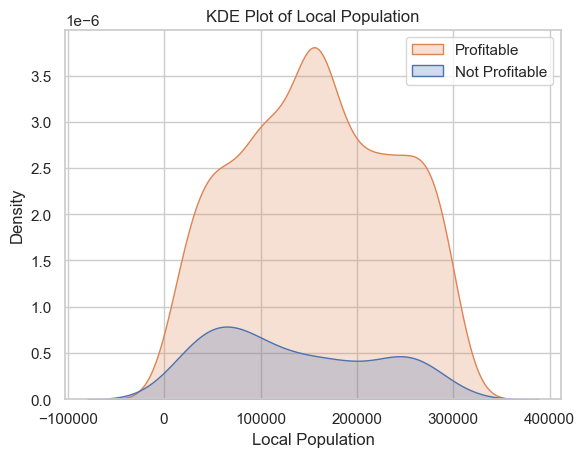

In [173]:
sns.kdeplot(data = df, x = 'local_pop', hue = 'year_3_profit', fill = True)
plt.xlabel("Local Population")
plt.ylabel("Density")
plt.title("KDE Plot of Local Population")
plt.legend(loc = 'best', labels = ['Profitable', 'Not Profitable'])

- _As local population increases, number of restaurants that are profitable also is more._

#### Distance to Nearest FGH vs Profitability

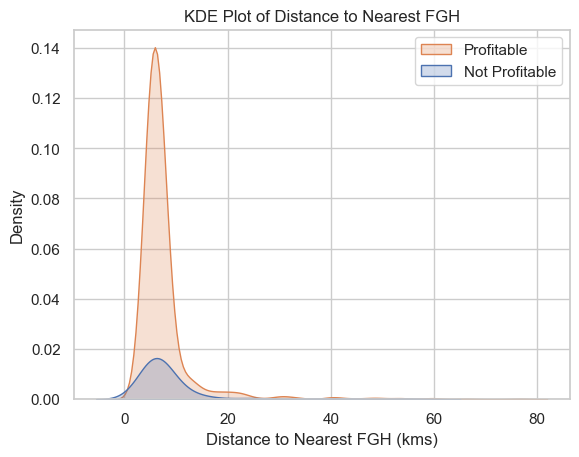

In [174]:
sns.kdeplot(data = df, x = 'nearest_fgh', hue = 'year_3_profit', fill = True)
plt.xlabel("Distance to Nearest FGH (kms)")
plt.ylabel("Density")
plt.title("KDE Plot of Distance to Nearest FGH")
plt.legend(loc = 'best', labels = ['Profitable', 'Not Profitable'])

#### Distance From Highway vs Profitability

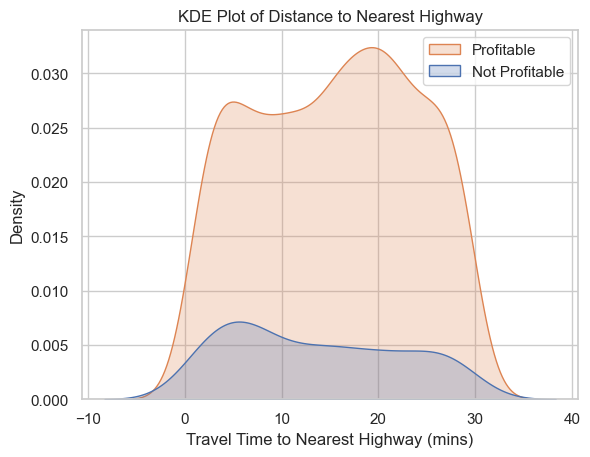

In [175]:
sns.kdeplot(data = df, x = 'highway', hue = 'year_3_profit', fill = True)
plt.xlabel("Travel Time to Nearest Highway (mins)")
plt.ylabel("Density")
plt.title("KDE Plot of Distance to Nearest Highway")
plt.legend(loc = 'best', labels = ['Profitable', 'Not Profitable'])

- The distribution shows that there are more number of profitable restaurants as the travel time from highway increases which is a bit contrary to the general fact. This was also found as an observation while checking out the summary statistics.

#### Service Hours vs Profitability

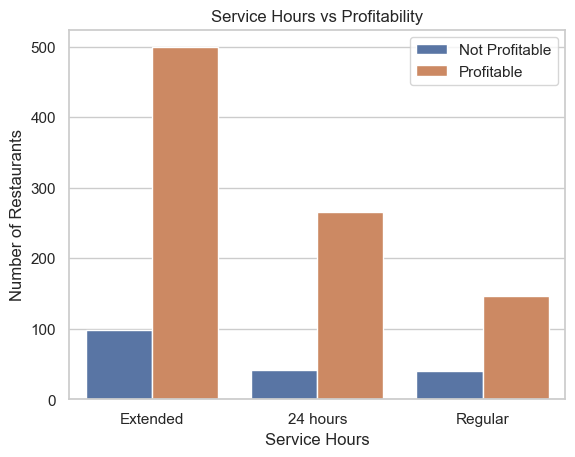

In [176]:
sns.countplot(data = df, x = 'hours', hue = 'year_3_profit')
plt.xlabel("Service Hours")
plt.ylabel("Number of Restaurants")
plt.title("Service Hours vs Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

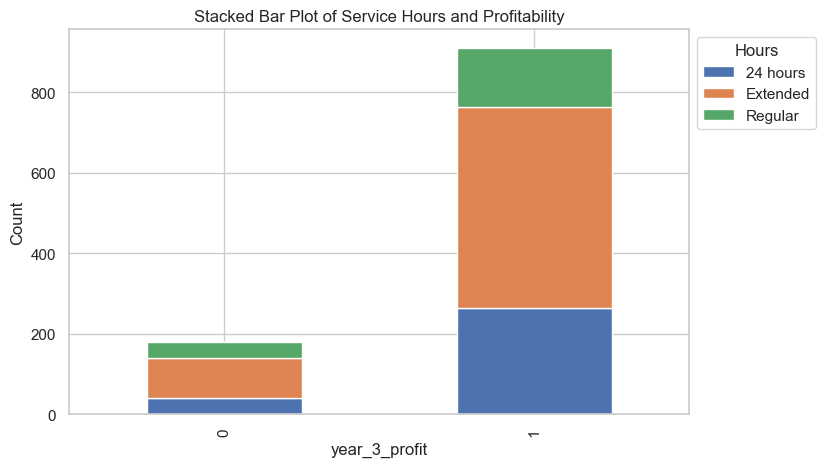

In [177]:
stacked_data_hours = df.groupby(['year_3_profit', 'hours']).size().unstack()

stacked_data_hours.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Plot of Service Hours and Profitability')
plt.xlabel('year_3_profit')
plt.ylabel('Count')
plt.legend(title='Hours', bbox_to_anchor=(1, 1))

plt.show()

- The count of profitable restaurants with Extended hours seems to be more. However, this would also be because there were 10% missing values in the column and they were replaced with the most repeated value, i.e "Extended".

#### Competitors vs Profitability

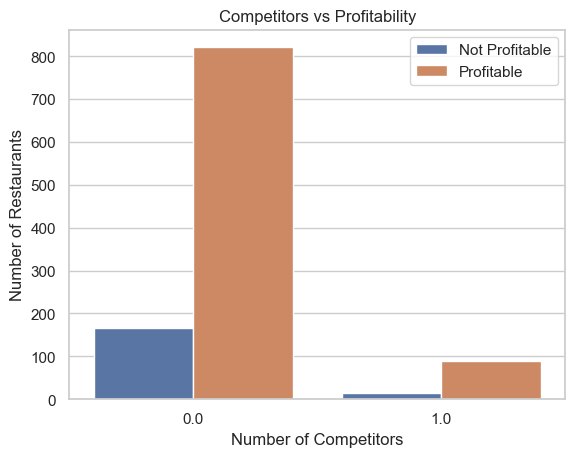

In [178]:
sns.countplot(data = df, x = 'competitors', hue = 'year_3_profit')
plt.xlabel("Number of Competitors")
plt.ylabel("Number of Restaurants")
plt.title("Competitors vs Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])


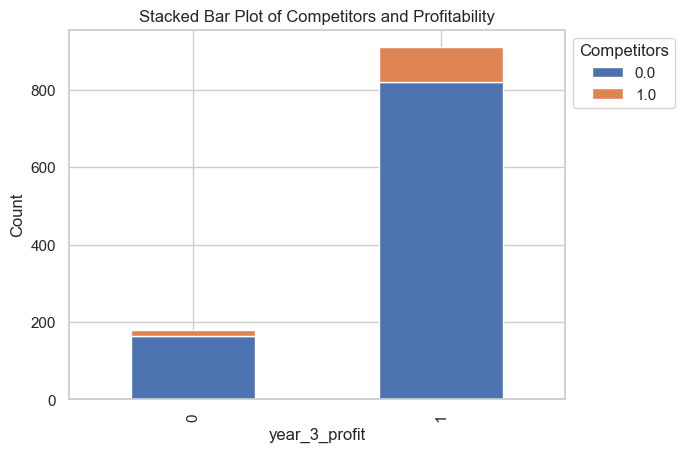

In [179]:
stacked_data_competitors = df.groupby(['year_3_profit', 'competitors']).size().unstack()

stacked_data_competitors.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Competitors and Profitability')
plt.xlabel('year_3_profit')
plt.ylabel('Count')
plt.legend(title='Competitors', bbox_to_anchor=(1, 1))

plt.show()

- We can see that, a lot of profitable restaurants with 0 competitors have been profitable. This algins with the fact that 91% of them do not havve any competitors in 2KM radius as observed in summary stats. 

#### Drive Through Service vs Profitability

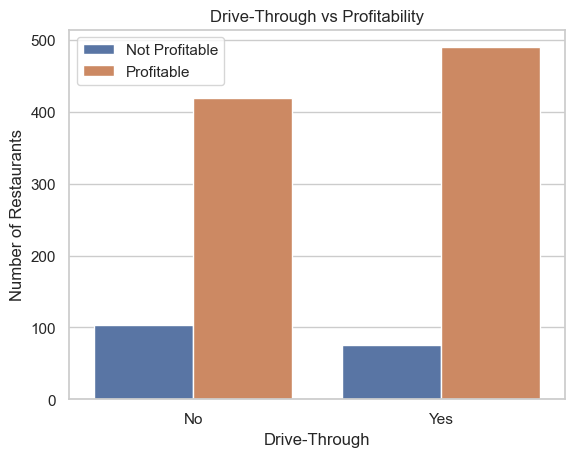

In [180]:
sns.countplot(data = df, x = 'drivethru', hue = 'year_3_profit')
plt.xlabel("Drive-Through")
plt.ylabel("Number of Restaurants")
plt.title("Drive-Through vs Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

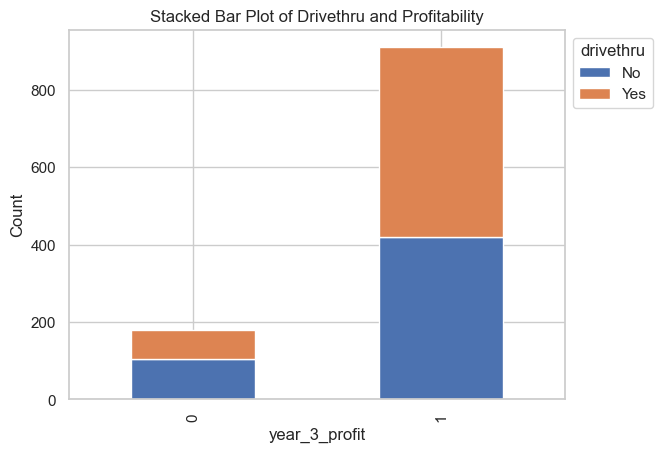

In [181]:
stacked_data_drivethru = df.groupby(['year_3_profit', 'drivethru']).size().unstack()

stacked_data_drivethru.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Drivethru and Profitability')
plt.xlabel('year_3_profit')
plt.ylabel('Count')
plt.legend(title='drivethru', bbox_to_anchor=(1, 1))

plt.show()

- The overall distribution of profitability is equally distributed w.r.t drive through option. 
- The franchise is aiming to have drive-thru service in new locations. However, there isn't significant reason to have or not have this service as the profitable/not-profitable distribution is almost equal. 

#### Distance from Highway vs Profitability

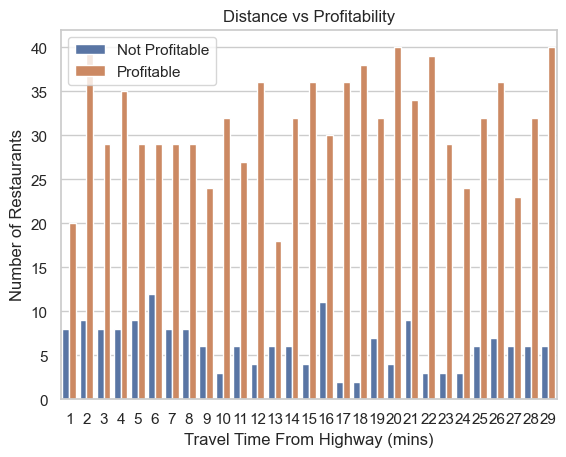

In [182]:
sns.countplot(data = df, x = 'highway', hue = 'year_3_profit')
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.title("Distance vs Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

Having a closer look on Highway vs Profitability by binning the values.
Creating 2 bins. One with travel time less than 15 mins, and the other greater than 15 mins.

In [183]:
# Creating a copy

df_highway_bin = df.copy()
df_highway_bin.loc[ df_highway_bin['highway'] <= 15, 'highway_bin' ] = '<= 15 minutes'
df_highway_bin.loc[ df_highway_bin['highway'] > 15, 'highway_bin' ] = '> 15 minutes'
df_highway_bin

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru,highway_bin
0,38195,1,125567.0,0.0,6.4,Extended,3,No,<= 15 minutes
1,12324,1,105571.0,0.0,5.3,24 hours,16,Yes,> 15 minutes
2,79567,0,104591.0,0.0,6.3,Extended,6,No,<= 15 minutes
3,41435,1,169028.0,0.0,6.0,Extended,5,Yes,<= 15 minutes
4,24969,1,153472.0,0.0,4.5,Extended,4,No,<= 15 minutes
...,...,...,...,...,...,...,...,...,...
1085,23969,0,277169.0,0.0,4.5,Regular,22,No,> 15 minutes
1086,72777,1,17805.0,0.0,14.4,Extended,15,Yes,<= 15 minutes
1087,14249,1,231969.0,0.0,5.2,24 hours,22,No,> 15 minutes
1088,91866,1,53674.0,0.0,9.4,Extended,9,Yes,<= 15 minutes


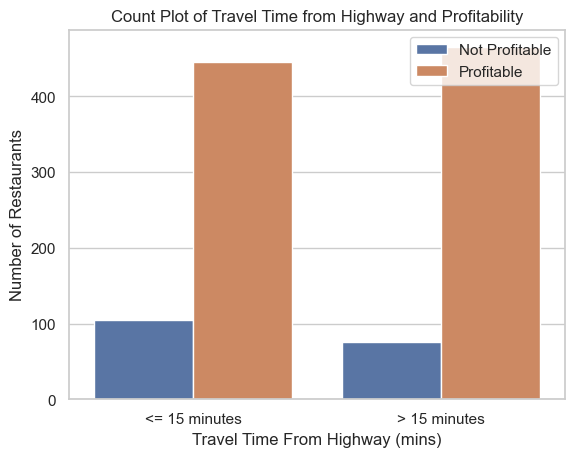

In [184]:
sns.countplot(data = df_highway_bin, x = 'highway_bin', hue = 'year_3_profit')
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.title("Count Plot of Travel Time from Highway and Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

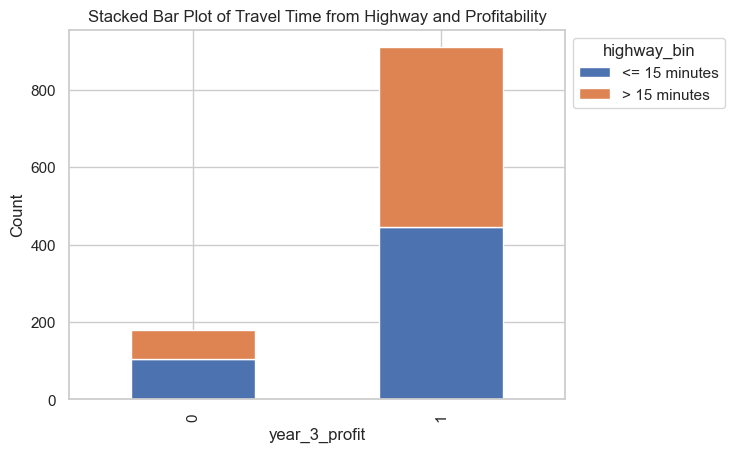

In [185]:
stacked_data_highway_bin = df_highway_bin.groupby(['year_3_profit', 'highway_bin']).size().unstack()

stacked_data_highway_bin.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Travel Time from Highway and Profitability')
plt.xlabel('year_3_profit')
plt.ylabel('Count')
plt.legend(title='highway_bin', bbox_to_anchor=(1, 1))

plt.show()

- Restaurants with more than 15 mins of travel time from highways have slightly high number of profitable count. 

#### Pair Plot

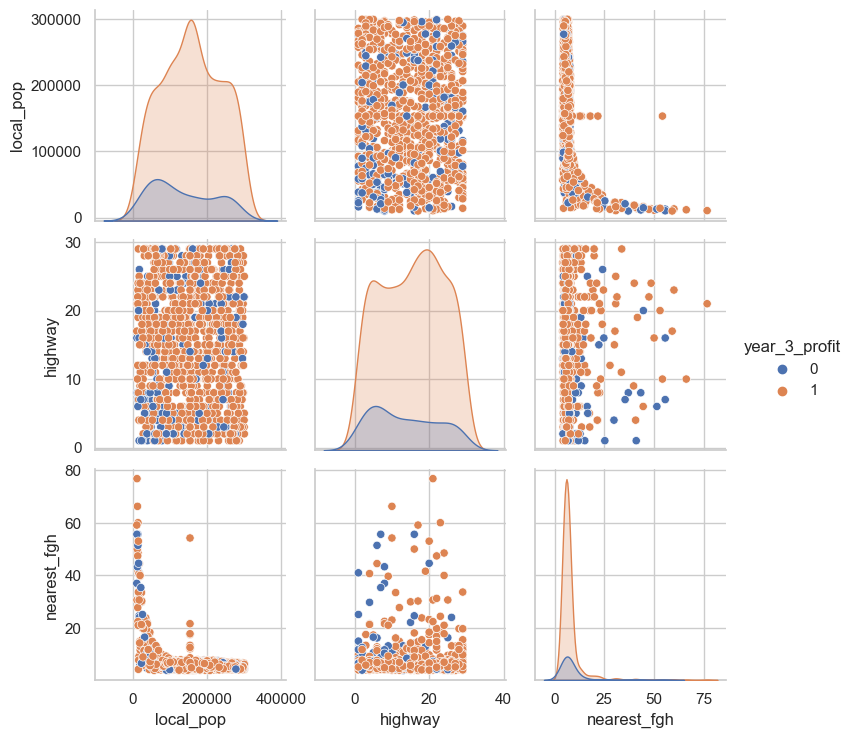

In [186]:
sns.pairplot(data = df[['local_pop','highway','nearest_fgh','year_3_profit']] ,hue = 'year_3_profit')

### Converting Categorical Columns To Numeric

_Label Encoder can be used to convert **drivethru** column values to Numeric since they are ordinal._

_**No** encoded as "0"._

_**Yes** encoded as "1"._

In [187]:
# Creating label encoder object and encoding the drivethru column

le = LabelEncoder()
df['drivethru_encoded'] = le.fit_transform(df['drivethru'])
df.drop(['drivethru'], axis = 1, inplace = True)
df.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru_encoded
0,38195,1,125567.0,0.0,6.4,Extended,3,0
1,12324,1,105571.0,0.0,5.3,24 hours,16,1
2,79567,0,104591.0,0.0,6.3,Extended,6,0
3,41435,1,169028.0,0.0,6.0,Extended,5,1
4,24969,1,153472.0,0.0,4.5,Extended,4,0
5,38255,1,197654.0,0.0,7.6,Extended,5,1
6,26925,1,265647.0,0.0,7.2,24 hours,2,1
7,91321,1,131662.0,0.0,6.3,Extended,20,1
8,20900,1,175574.0,0.0,6.8,Extended,4,1
9,11136,1,22738.0,0.0,33.5,24 hours,11,1


_Similarly, **hours** column needs to be converted to numeric. We can use **_map()_** function to implement this since it is ordinal and "24 hours" service is preferred by the franchise._

_**24 hours** encoded as "2"._

_**Extended** encoded as "1"._

_**Regular** encoded as "0"._

In [188]:
hours_dict = {"Regular": 0, "Extended": 1, "24 hours": 2}
df['hours_encoded'] = df['hours'].map(hours_dict)
df.drop(['hours'], axis = 1, inplace = True)
df.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded
0,38195,1,125567.0,0.0,6.4,3,0,1
1,12324,1,105571.0,0.0,5.3,16,1,2
2,79567,0,104591.0,0.0,6.3,6,0,1
3,41435,1,169028.0,0.0,6.0,5,1,1
4,24969,1,153472.0,0.0,4.5,4,0,1
5,38255,1,197654.0,0.0,7.6,5,1,1
6,26925,1,265647.0,0.0,7.2,2,1,2
7,91321,1,131662.0,0.0,6.3,20,1,1
8,20900,1,175574.0,0.0,6.8,4,1,1
9,11136,1,22738.0,0.0,33.5,11,1,2


## Transforming and Scaling the Data

Creating a copy of the dataset so that original dataframe will be unaltered.

In [189]:
df_copy = df.copy()
df_copy.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded
0,38195,1,125567.0,0.0,6.4,3,0,1
1,12324,1,105571.0,0.0,5.3,16,1,2
2,79567,0,104591.0,0.0,6.3,6,0,1
3,41435,1,169028.0,0.0,6.0,5,1,1
4,24969,1,153472.0,0.0,4.5,4,0,1
5,38255,1,197654.0,0.0,7.6,5,1,1
6,26925,1,265647.0,0.0,7.2,2,1,2
7,91321,1,131662.0,0.0,6.3,20,1,1
8,20900,1,175574.0,0.0,6.8,4,1,1
9,11136,1,22738.0,0.0,33.5,11,1,2


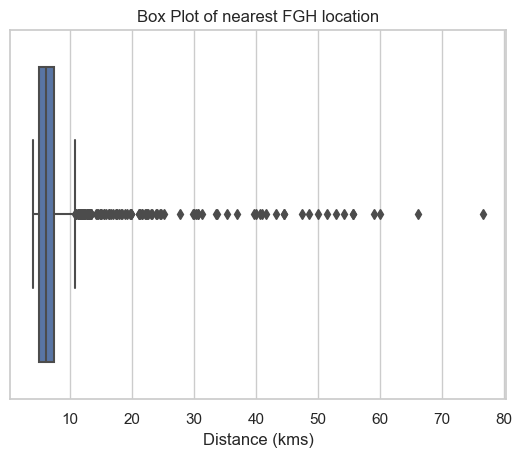

In [190]:
sns.boxplot(data= df_copy, x = 'nearest_fgh')
plt.title('Box Plot of nearest FGH location')
plt.xlabel('Distance (kms)')
plt.show()

_"nearest_fgh" is **right skewed** and hence, must be transformed._

### Outlier Treatment using IQR

_Interquartile range is calcluated and the minimum and maximum values are capped._

In [191]:
# Taking 25th and 75th quantile range of 'nearest_fgh' column

Q1 = df_copy['nearest_fgh'].quantile(0.25)
Q3 = df_copy['nearest_fgh'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter-Quartile Range: {IQR}")

Inter-Quartile Range: 2.3000000000000007


In [192]:
# Calculating lower and upper bound values
lower_bound = round((Q1 - (1.5 * IQR)),2)
upper_bound = round((Q3 + (1.5 * IQR)),2)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 1.65 
Upper Bound: 10.85


In [193]:
# Capping the values to lower and upper bound

df_copy['nearest_fgh'] = df_copy['nearest_fgh'].apply(lambda x: upper_bound if x > upper_bound else x)
df_copy['nearest_fgh'] = df_copy['nearest_fgh'].apply(lambda x: lower_bound if x < lower_bound else x)
df_copy['nearest_fgh'].head(10)


0     6.40
1     5.30
2     6.30
3     6.00
4     4.50
5     7.60
6     7.20
7     6.30
8     6.80
9    10.85
Name: nearest_fgh, dtype: float64

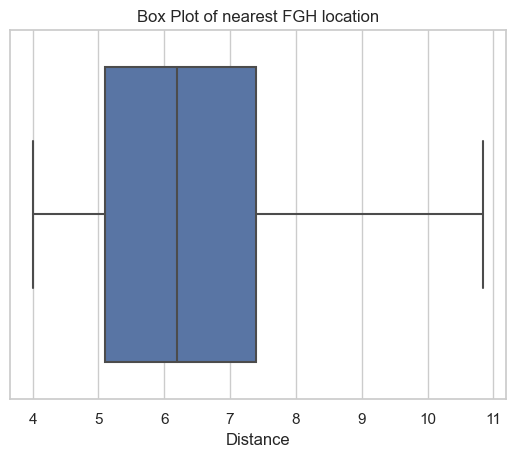

In [194]:
sns.boxplot(data= df_copy, x = 'nearest_fgh')
plt.title('Box Plot of nearest FGH location')
plt.xlabel('Distance')
plt.show()

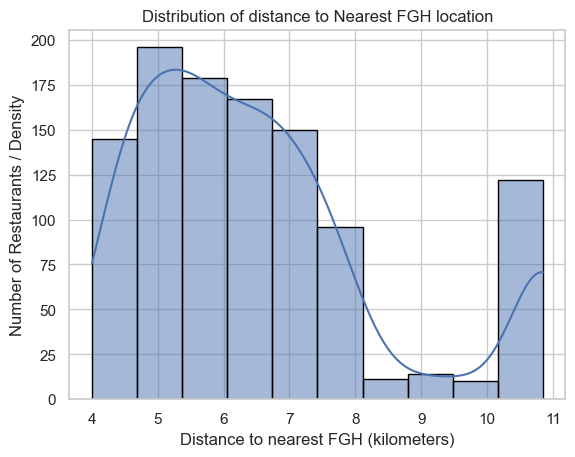

In [195]:
sns.histplot( data = df_copy, x = 'nearest_fgh', kde = True , edgecolor = 'black', bins = 10)
plt.title('Distribution of distance to Nearest FGH location')
plt.xlabel('Distance to nearest FGH (kilometers)')
plt.ylabel('Number of Restaurants / Density')
plt.show()

## a) Transformation

_The distribution of "nearest_fgh" column is **skewed and can affect the model's performance**. Hence, the data must be transformed by appropriate method. We can apply both Log and Power transformation technique and choose the suitable one._ 

### Log Transformation

In [196]:
df_copy['nearest_fgh_log'] = round((np.log(df_copy['nearest_fgh'])), 2)
df_copy.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded,nearest_fgh_log
0,38195,1,125567.0,0.0,6.40,3,0,1,1.86
1,12324,1,105571.0,0.0,5.30,16,1,2,1.67
2,79567,0,104591.0,0.0,6.30,6,0,1,1.84
3,41435,1,169028.0,0.0,6.00,5,1,1,1.79
4,24969,1,153472.0,0.0,4.50,4,0,1,1.50
5,38255,1,197654.0,0.0,7.60,5,1,1,2.03
6,26925,1,265647.0,0.0,7.20,2,1,2,1.97
7,91321,1,131662.0,0.0,6.30,20,1,1,1.84
8,20900,1,175574.0,0.0,6.80,4,1,1,1.92
9,11136,1,22738.0,0.0,10.85,11,1,2,2.38


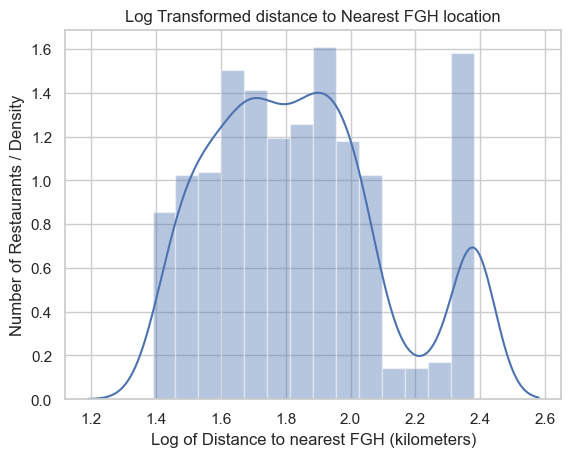

In [197]:
sns.distplot(df_copy['nearest_fgh_log'])
plt.title('Log Transformed distance to Nearest FGH location')
plt.xlabel('Log of Distance to nearest FGH (kilometers)')
plt.ylabel('Number of Restaurants / Density')
plt.show()

_From the distribution, we see that **Log transformed data** of "nearest_fgh" is **closer to normal** distribution compared to original column values. However, it still has a right tail._


### Power Transformation

In [198]:
pt = PowerTransformer()
df_copy['nearest_fgh_pt'] = pt.fit_transform(df_copy[['nearest_fgh']])
df_copy['nearest_fgh_pt'] = round(df_copy['nearest_fgh_pt'], 2)
df_copy.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded,nearest_fgh_log,nearest_fgh_pt
0,38195,1,125567.0,0.0,6.40,3,0,1,1.86,0.18
1,12324,1,105571.0,0.0,5.30,16,1,2,1.67,-0.61
2,79567,0,104591.0,0.0,6.30,6,0,1,1.84,0.11
3,41435,1,169028.0,0.0,6.00,5,1,1,1.79,-0.08
4,24969,1,153472.0,0.0,4.50,4,0,1,1.50,-1.40
5,38255,1,197654.0,0.0,7.60,5,1,1,2.03,0.78
6,26925,1,265647.0,0.0,7.20,2,1,2,1.97,0.60
7,91321,1,131662.0,0.0,6.30,20,1,1,1.84,0.11
8,20900,1,175574.0,0.0,6.80,4,1,1,1.92,0.40
9,11136,1,22738.0,0.0,10.85,11,1,2,2.38,1.75


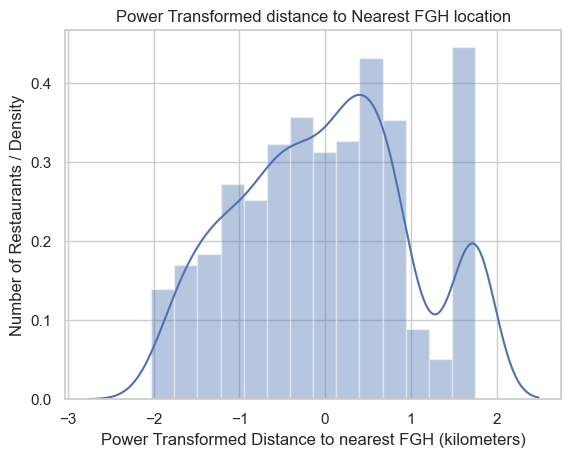

In [199]:
sns.distplot(df_copy['nearest_fgh_pt'])
plt.title('Power Transformed distance to Nearest FGH location')
plt.xlabel('Power Transformed Distance to nearest FGH (kilometers)')
plt.ylabel('Number of Restaurants / Density')
plt.show()

_The distribution of **power transformed** column is **more normal-like** compared to log transformed and original column._

## b) Scaling the data

_**local_pop, nearest_fgh_pt, highway** columns are on different measurement units and values are in different ranges. Hence, we will have to scale the data to make them easier to compare._

In [200]:
std_scaler = StandardScaler()

In [201]:
df_copy[['local_pop_scaled','nearest_fgh_scaled','highway_scaled']] = std_scaler.fit_transform(df_copy[['local_pop','nearest_fgh_pt','highway']])

df_copy[['local_pop_scaled','nearest_fgh_scaled','highway_scaled']] = round(df_copy[['local_pop_scaled','nearest_fgh_scaled','highway_scaled']], 2)
df_copy.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded,nearest_fgh_log,nearest_fgh_pt,local_pop_scaled,nearest_fgh_scaled,highway_scaled
0,38195,1,125567.0,0.0,6.40,3,0,1,1.86,0.18,-0.35,0.18,-1.43
1,12324,1,105571.0,0.0,5.30,16,1,2,1.67,-0.61,-0.59,-0.61,0.11
2,79567,0,104591.0,0.0,6.30,6,0,1,1.84,0.11,-0.61,0.11,-1.08
3,41435,1,169028.0,0.0,6.00,5,1,1,1.79,-0.08,0.19,-0.08,-1.19
4,24969,1,153472.0,0.0,4.50,4,0,1,1.50,-1.40,0.00,-1.40,-1.31
5,38255,1,197654.0,0.0,7.60,5,1,1,2.03,0.78,0.55,0.78,-1.19
6,26925,1,265647.0,0.0,7.20,2,1,2,1.97,0.60,1.39,0.60,-1.55
7,91321,1,131662.0,0.0,6.30,20,1,1,1.84,0.11,-0.27,0.11,0.59
8,20900,1,175574.0,0.0,6.80,4,1,1,1.92,0.40,0.27,0.40,-1.31
9,11136,1,22738.0,0.0,10.85,11,1,2,2.38,1.75,-1.62,1.75,-0.48


#### Dropping unnecessary independent variables. 

In [202]:
df_copy.drop(['location','local_pop','nearest_fgh','nearest_fgh_pt','nearest_fgh_log','highway'], axis = 1, inplace = True)
df_copy.head(10)

,year_3_profit,competitors,drivethru_encoded,hours_encoded,local_pop_scaled,nearest_fgh_scaled,highway_scaled
0,1,0.0,0,1,-0.35,0.18,-1.43
1,1,0.0,1,2,-0.59,-0.61,0.11
2,0,0.0,0,1,-0.61,0.11,-1.08
3,1,0.0,1,1,0.19,-0.08,-1.19
4,1,0.0,0,1,0.00,-1.40,-1.31
5,1,0.0,1,1,0.55,0.78,-1.19
6,1,0.0,1,2,1.39,0.60,-1.55
7,1,0.0,1,1,-0.27,0.11,0.59
8,1,0.0,1,1,0.27,0.40,-1.31
9,1,0.0,1,2,-1.62,1.75,-0.48


# Model Development

_One of the business task requirement here is to predict whether the third year profits are positive with 75% accuracy. This is a **Classification** problem_. 

_I'll be using **Logistic Regression** first and check its performance. Based on the accuracy, we can take the call about other models. Going further here, we can see, I have also reasoned out and built **Support Vector Classifier** and **Random Forest Classifier** models._

## Preparing the Training and Test set

In [203]:
X = df_copy.drop(['year_3_profit'], axis = 1)
X.head()

,competitors,drivethru_encoded,hours_encoded,local_pop_scaled,nearest_fgh_scaled,highway_scaled
0,0.0,0,1,-0.35,0.18,-1.43
1,0.0,1,2,-0.59,-0.61,0.11
2,0.0,0,1,-0.61,0.11,-1.08
3,0.0,1,1,0.19,-0.08,-1.19
4,0.0,0,1,0.00,-1.40,-1.31


In [204]:
y = df_copy['year_3_profit']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: year_3_profit, dtype: int64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 7)

In [206]:
y_train.value_counts(normalize = True)

1    0.834862
0    0.165138
Name: year_3_profit, dtype: float64

## Logistic Regression

In [207]:
log_reg = LogisticRegression()

#### Training the model

In [208]:
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Prediction and Evaluation of the model

In [209]:
# Predicting on the test set

y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [210]:
print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100, 2)}")

Accuracy Score: 83.49


In [211]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.83      1.00      0.91       273

    accuracy                           0.83       327
   macro avg       0.42      0.50      0.45       327
weighted avg       0.70      0.83      0.76       327



In [212]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix:
 [[  0  54]
 [  0 273]]


In [213]:
y_train.value_counts(normalize = True)

1    0.834862
0    0.165138
Name: year_3_profit, dtype: float64

_From the above result we see, accuracy is 83%. However, the True Negative Rate is 0. This is because:_

- _The dataset size is **too small**._

- _"1" is the **majority class with more than 83%** of the sample having the value causing **class imbalance** in the training set. The model has less samples to learn about output 0._

- _To address this, we can use **SMOTE method** to generate synthetic samples._

### SMOTE Technique

In [214]:
X_train.head(10)

,competitors,drivethru_encoded,hours_encoded,local_pop_scaled,nearest_fgh_scaled,highway_scaled
293,1.0,1,2,0.11,-0.22,-0.72
500,0.0,1,2,-1.38,0.69,1.06
900,0.0,0,0,-0.24,-0.52,0.59
432,0.0,1,2,-0.61,0.90,-0.48
643,0.0,0,1,-0.46,-0.01,-0.24
1007,1.0,0,1,-0.78,-0.97,-0.48
13,0.0,1,1,1.29,-0.22,-1.67
830,0.0,1,1,-0.03,-1.89,0.23
676,0.0,0,0,-1.25,-1.07,-0.48
788,1.0,0,2,0.66,0.74,-0.01


In [215]:
smote = SMOTE(sampling_strategy='auto', random_state=8)

In [216]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardizing the data
std_scaler = StandardScaler()
X_train_smote_scaled = std_scaler.fit_transform(X_train_smote)
X_test_scaled = std_scaler.transform(X_test)

In [217]:
y_train_smote.value_counts(normalize = True)

1    0.5
0    0.5
Name: year_3_profit, dtype: float64

_From the above result, we see both class in the target variable are **equally distributed**._

#### Training the model using SMOTE data

In [218]:
log_reg.fit(X_train_smote_scaled, y_train_smote)

LogisticRegression()

In [219]:
# Predicting on the test set
y_pred_smote = log_reg.predict(X_test_scaled)
y_pred_smote

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [220]:
# Predicting on the training set

y_train_pred_lr = log_reg.predict(X_train_smote_scaled)
print(f"Accuracy Score on Training set: {round(accuracy_score(y_train_smote, y_train_pred_lr)*100, 2)}")

print(f"Accuracy Score on Test set: {round(accuracy_score(y_test, y_pred_smote)*100, 2)}")

Accuracy Score on Training set: 62.01
Accuracy Score on Test set: 60.86


In [221]:
print(f"Classification Report:\n {classification_report(y_test, y_pred_smote)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.52      0.30        54
           1       0.87      0.63      0.73       273

    accuracy                           0.61       327
   macro avg       0.54      0.57      0.52       327
weighted avg       0.76      0.61      0.66       327



In [222]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_smote)}")

Confusion Matrix:
 [[ 28  26]
 [102 171]]


#### Computing best performing parameters using GridSearchCV

In [223]:
param_grid = {
    'C': [0.001, 0.001,0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2'],
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [224]:
# Finding out the best parameters for the model

grid_search.fit(X_train_smote_scaled, y_train_smote)
print('Best Parameters:', grid_search.best_params_)
print('Best Estimator:', grid_search.best_estimator_)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.001, solver='newton-cg')


In [225]:
# Recreating the object with best parameters and predicting on test set

log_reg = LogisticRegression(C=0.001, penalty='l2', solver='newton-cg')
log_reg.fit(X_train_smote_scaled, y_train_smote)
y_pred_smote_best = log_reg.predict(X_test_scaled)
y_pred_smote_best

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [226]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_smote_best))

Classification Report:

              precision    recall  f1-score   support

           0       0.22      0.54      0.32        54
           1       0.87      0.63      0.73       273

    accuracy                           0.61       327
   macro avg       0.55      0.58      0.52       327
weighted avg       0.77      0.61      0.66       327



In [227]:
y_train_pred_lr = log_reg.predict(X_train_smote_scaled)
print(f"Accuracy Score on Training set: {round(accuracy_score(y_train_smote, y_train_pred_lr)*100, 2)}")


print(f"Accuracy Score on Test set: {round(accuracy_score(y_test, y_pred_smote_best)*100, 2)}")

Accuracy Score on Training set: 61.93
Accuracy Score on Test set: 61.47


#### Confusion Matrix

Confusion Matrix: 
[[ 29  25]
 [101 172]]


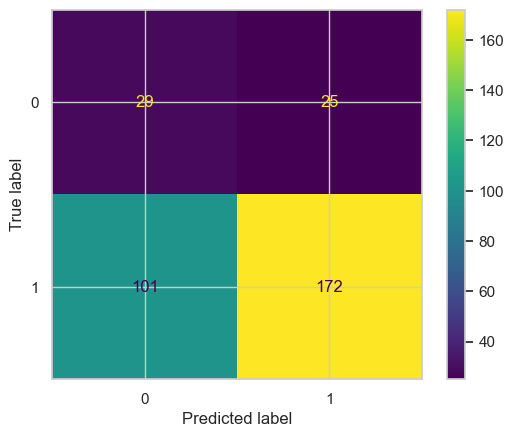

In [278]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_smote_best)}")

cm = confusion_matrix(y_test, y_pred_smote_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### _The accuracy of Logistic Regression model is still low even after addressing class imbalance issue. It is failing to distinguish the samples accurately. Hence, we can reject this model._

## Support Vector Classifier

#### Computing the best parameters to build the model using GridSearchCV

In [228]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 250, 300],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'degree': [1,2,3]
}

grid_search_svc = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search_svc.fit(X_train_smote_scaled, y_train_smote)

# Finding out the best parameters
print('Best Parameters:', grid_search_svc.best_params_)

Best Parameters: {'C': 250, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [229]:
# Creating the SVC object with best parameters and predicting on test set

best_svc = SVC(C=250, kernel='rbf', gamma='auto', degree = 1)

best_svc.fit(X_train_smote_scaled, y_train_smote)

y_pred_svc = best_svc.predict(X_test_scaled)
y_pred_svc

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [230]:
# Predicting on the training set

y_train_pred_svc = best_svc.predict(X_train_smote_scaled)
print(f"Accuracy on Training set: {round(accuracy_score(y_train_smote, y_train_pred_svc)*100, 2)}")

print(f"Accuracy on Test set: {round(accuracy_score(y_test, y_pred_svc)*100, 2)}")

Accuracy on Training set: 86.89
Accuracy on Test set: 71.56


In [231]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred_svc)
report = classification_report(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)

print(f'Accuracy: {round(accuracy * 100, 2)}')
print('\nClassification Report:\n', report)
print(f'Confusion Matrix:\n', conf_matrix)

Accuracy: 71.56

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.43      0.33        54
           1       0.87      0.77      0.82       273

    accuracy                           0.72       327
   macro avg       0.57      0.60      0.58       327
weighted avg       0.77      0.72      0.74       327

Confusion Matrix:
 [[ 23  31]
 [ 62 211]]


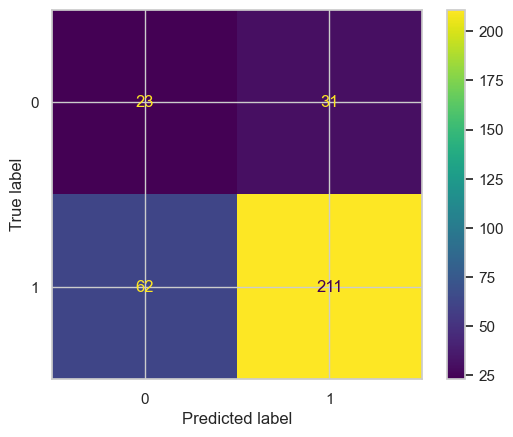

In [276]:
cm = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### _Accuracy of SVC is significantly better than Logistic Regression. However, the business requirement is to have atleast 75% accuracy. Hence, moving on to the next model, Random Forest._

## Random Forest Classifier

_Computing the parameters for best performance using **RandomSearchCV**_

In [232]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
             }

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=10, cv=5, random_state=91)

# Fitting the object to the Training data
rand_search.fit(X_train_smote_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc474d55cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc4849202e0>},
                   random_state=91)

In [233]:
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 224}


### Training the model based on the computed parameters

In [234]:
# Recreating the Random Forest Classifier object with best parameters 

rf = RandomForestClassifier(**rand_search.best_params_, random_state=52)
rf.fit(X_train_smote_scaled, y_train_smote)

RandomForestClassifier(max_depth=19, n_estimators=224, random_state=52)

In [235]:
# Predicting on test set

y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

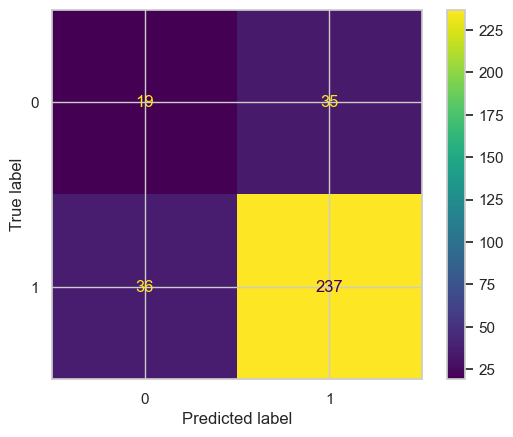

In [236]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [237]:
print("Random Forest Classifier -")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred_rf) * 100, 2)}%\n")

Random Forest Classifier -
Accuracy: 78.29%



In [238]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        54
           1       0.87      0.87      0.87       273

    accuracy                           0.78       327
   macro avg       0.61      0.61      0.61       327
weighted avg       0.78      0.78      0.78       327



- _The Accuracy of Random Forest Classifier is the best among the 3 models and is more 75%._

### Extracting Feature Importance

In [239]:
# Extracting important features and arranging in descending order of importance. 

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance_sorted)


Feature Importance:
local_pop_scaled      0.312056
highway_scaled        0.291568
nearest_fgh_scaled    0.251060
hours_encoded         0.062427
competitors           0.042276
drivethru_encoded     0.040612
dtype: float64


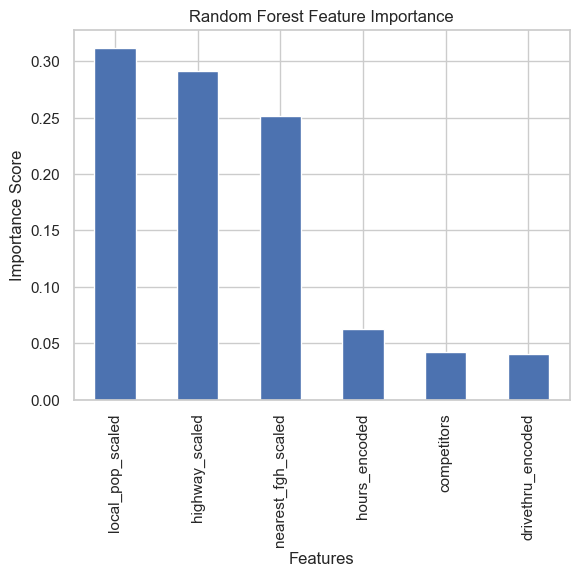

In [240]:
feature_importance_sorted.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

## The top 3 features of importance from the model:
- ### Local Population
- ### Travel time from nearest Highway
- ### Distance to the nearest neighbouring FGH restaurant.

### Checking out the relationship between these features w.r.t Profitability

Detailed explanation given later. 

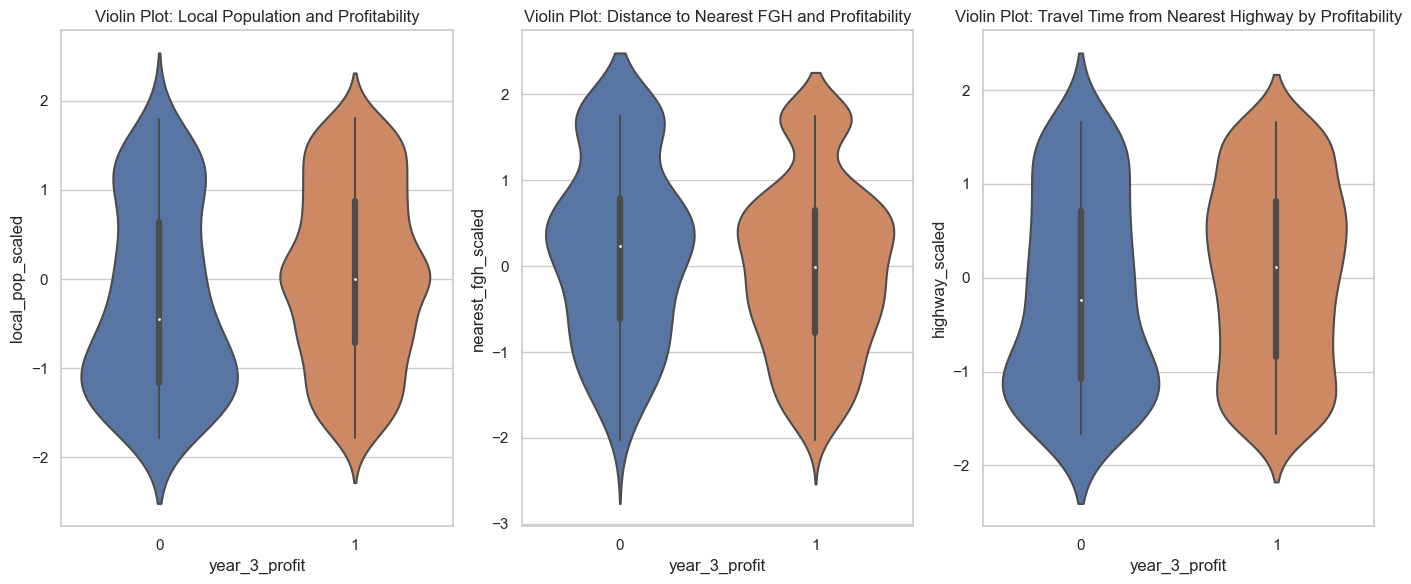

In [241]:
# Violin Plot for local_pop by year_3_profit
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.violinplot(data = df_copy, x='year_3_profit', y='local_pop_scaled')
plt.title('Violin Plot: Local Population and Profitability')

# Violin Plot for nearest_fgh by year_3_profit
plt.subplot(1, 3, 2)
sns.violinplot(data = df_copy, x='year_3_profit', y='nearest_fgh_scaled')
plt.title('Violin Plot: Distance to Nearest FGH and Profitability')

# Violin Plot for highway by year_3_profit
plt.subplot(1, 3, 3)
sns.violinplot(data = df_copy, x='year_3_profit', y='highway_scaled')
plt.title('Violin Plot: Travel Time from Nearest Highway by Profitability')

plt.tight_layout()
plt.show()

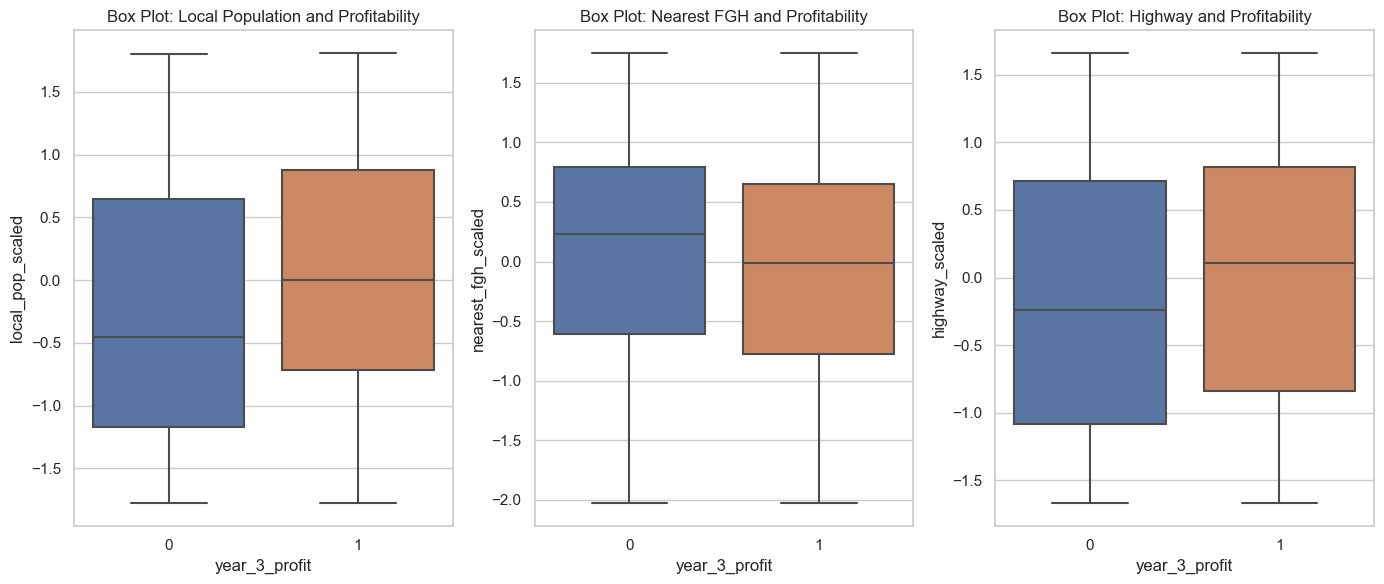

In [242]:
# Box Plot for local_pop by year_3_profit
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_copy, x='year_3_profit', y='local_pop_scaled')
plt.title('Box Plot: Local Population and Profitability')

# Box Plot for nearest_fgh by year_3_profit
plt.subplot(1, 3, 2)
sns.boxplot(data=df_copy, x='year_3_profit', y='nearest_fgh_scaled')
plt.title('Box Plot: Nearest FGH and Profitability')

# Box Plot for highway by year_3_profit
plt.subplot(1, 3, 3)
sns.boxplot(data=df_copy, x='year_3_profit', y='highway_scaled')
plt.title('Box Plot: Highway and Profitability')

plt.tight_layout()
plt.show()

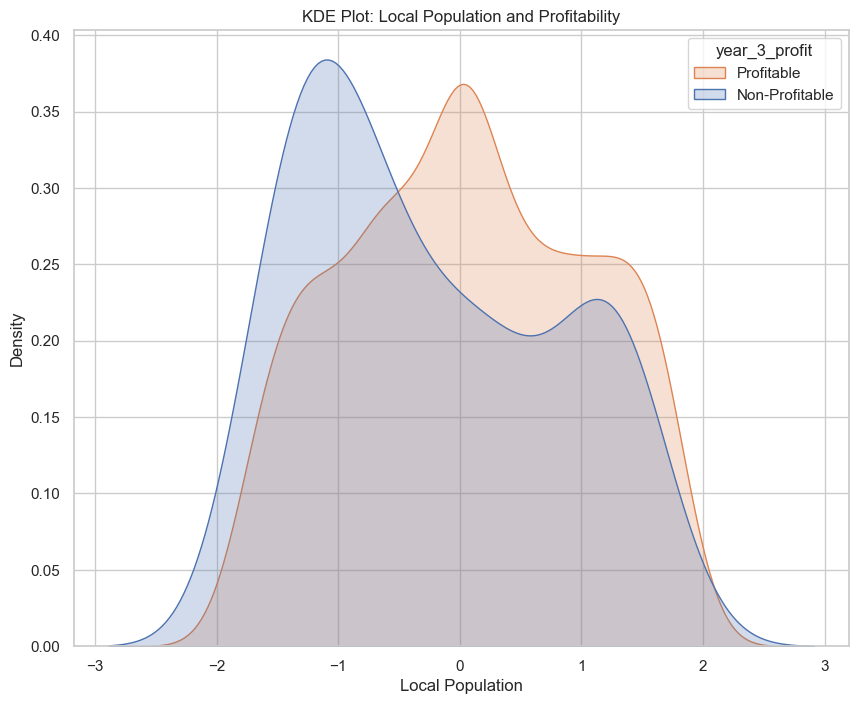

In [243]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_copy, x='local_pop_scaled', hue='year_3_profit', fill=True, common_norm=False)
plt.title('KDE Plot: Local Population and Profitability')
plt.xlabel('Local Population')
plt.ylabel('Density')
plt.legend(title='year_3_profit', labels=['Profitable','Non-Profitable'])
plt.show()

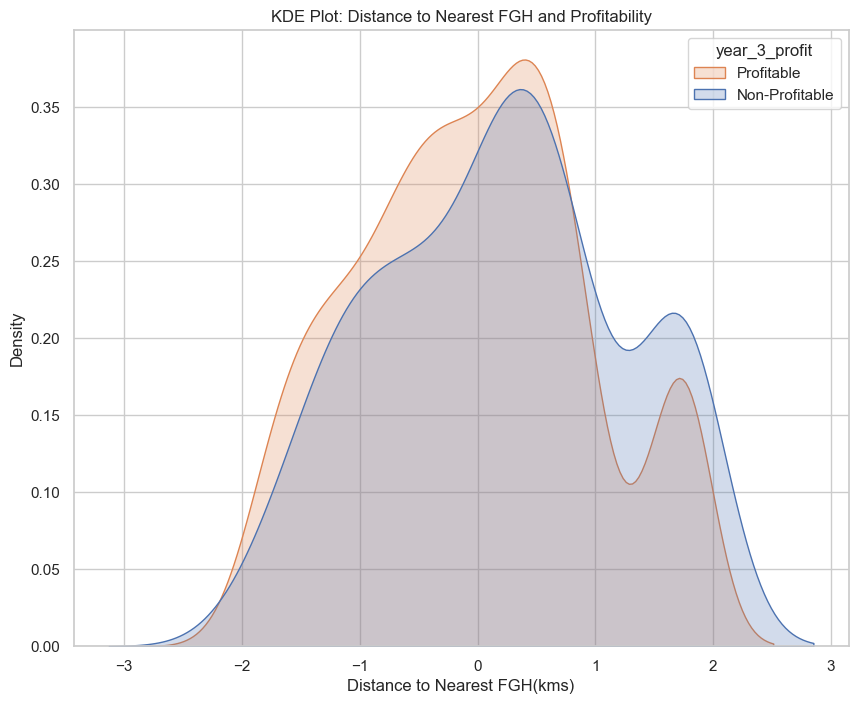

In [244]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_copy, x='nearest_fgh_scaled', hue='year_3_profit', fill=True, common_norm=False)
plt.title('KDE Plot: Distance to Nearest FGH and Profitability')
plt.xlabel('Distance to Nearest FGH(kms)')
plt.ylabel('Density')
plt.legend(title='year_3_profit', labels=['Profitable','Non-Profitable'])
plt.show()

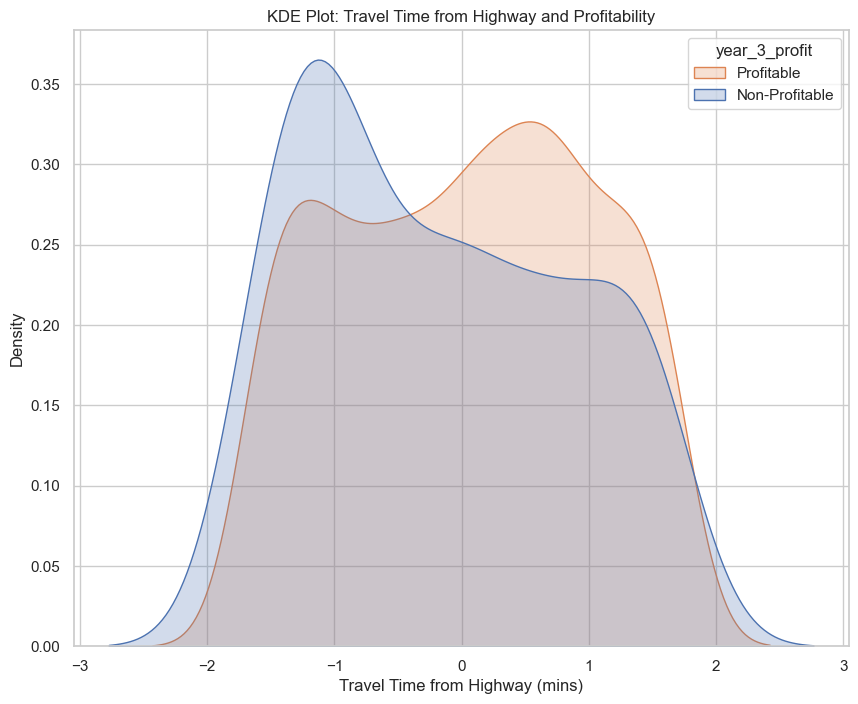

In [245]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_copy, x='highway_scaled', hue='year_3_profit', fill=True, common_norm=False)
plt.title('KDE Plot: Travel Time from Highway and Profitability')
plt.xlabel('Travel Time from Highway (mins)')
plt.ylabel('Density')
plt.legend(title='year_3_profit', labels=['Profitable','Non-Profitable'])
plt.show()

# Model Evaluation

### Comparing the performance of all 3 models

### KPI Selection:
The franchise is looking for a model that can predict whether the third-year profits are positive with 75% accuracy. So we can choosse **"ACCURACY"** as one KPI and compare the accuracy of the 3 models. Since we are also focused on positive predicitons, exploring Precision also be a good indicator. In addition, we can also check Recall and F1-score.

- Accuracy - Focuses on total number of correct predictions
- Precision - Focuses on total number of correct Positive Prediciton

#### a) Cross Validation Score

I am finding out cross validation score of the 3 models. This is done by dividing the dataset into 10 subsets (cv = 10 mentioned below), and the model is trained and evaluated 10 times, using a different fold as the test set in each iteration. The scoring metric is "accuracy". The mean of the scores from respective model is taken and we can check which performs the best. 

Random Forest CLassifier has a better score here comparitively. 

In [246]:
logreg_cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
svc_cv_scores = cross_val_score(best_svc, X, y, cv=10, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy:", round(logreg_cv_scores.mean() * 100,2))
print("Random Forest Cross-Validation Accuracy:", round(rf_cv_scores.mean() * 100,2))
print("SVC Cross-Validation Accuracy:", round(svc_cv_scores.mean() * 100,2))

Logistic Regression Cross-Validation Accuracy: 83.49
Random Forest Cross-Validation Accuracy: 84.4
SVC Cross-Validation Accuracy: 84.31


#### b) Confusion Matrix

Confusion Matrix reveals that Random Forest CLassifier is doing a better job is correctly predicting true values. 

In [247]:
# Confusion matrix for logistic regression
logreg_conf_matrix = confusion_matrix(y_test, y_pred_smote)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)
print(f"Number of True Predictions: {logreg_conf_matrix[0][0] + logreg_conf_matrix[1][1]}")
print("\n\n")

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:\n", rf_conf_matrix)
print(f"Number of True Predictions: {rf_conf_matrix[0][0] + rf_conf_matrix[1][1]}")
print("\n\n")

# Confusion matrix for SVC
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("\nSVC Confusion Matrix:\n", svc_conf_matrix)
print(f"Number of True Predictions: {svc_conf_matrix[0][0] + svc_conf_matrix[1][1]}")


Logistic Regression Confusion Matrix:
 [[ 28  26]
 [102 171]]
Number of True Predictions: 199




Random Forest Confusion Matrix:
 [[ 19  35]
 [ 36 237]]
Number of True Predictions: 256




SVC Confusion Matrix:
 [[ 23  31]
 [ 62 211]]
Number of True Predictions: 234


### c) Measuring KPI values :- Accuracy and Precision along side Recall and F1-score

In [284]:
logreg_accuracy = accuracy_score(y_test, y_pred_smote)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svc_accuracy = accuracy_score(y_test, y_pred_svc)


logreg_roc_auc = roc_auc_score(y_test, y_pred_smote)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
svc_roc_auc = roc_auc_score(y_test, y_pred_svc)

print("Logistic Regression -\n")
print(f"Accuracy: {round((logreg_accuracy * 100),2)}")
print(f"AUC-ROC: {round(logreg_roc_auc,2)}")
print("Precision:",round(metrics.precision_score(y_test, y_pred_smote)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred_smote)*100, 2))
print("F1-Score:",round(metrics.f1_score(y_test, y_pred_smote), 2))
print("\n\n")

print("Random Forest -\n")
print(f"Accuracy: {round((rf_accuracy * 100), 2)}")
print(f"AUC-ROC: {round(rf_roc_auc,2)}")
print("Precision:",round(metrics.precision_score(y_test, y_pred_rf)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred_rf)*100, 2))
print("F1-Score:",round(metrics.f1_score(y_test, y_pred_rf), 2))


print("\n\n")

print("Support Vector Classifier -\n")
print(f"Accuracy: {round((svc_accuracy * 100), 2)}")
print(f"AUC-ROC: {round(svc_roc_auc,2)}")
print("Precision:",round(metrics.precision_score(y_test, y_pred_svc)*100, 2))
print("Recall:", round(metrics.recall_score(y_test, y_pred_svc)*100, 2))
print("F1-Score:",round(metrics.f1_score(y_test, y_pred_svc), 2))

Logistic Regression -

Accuracy: 60.86
AUC-ROC: 0.57
Precision: 86.8
Recall: 62.64
F1-Score: 0.73



Random Forest -

Accuracy: 78.29
AUC-ROC: 0.61
Precision: 87.13
Recall: 86.81
F1-Score: 0.87



Support Vector Classifier -

Accuracy: 71.56
AUC-ROC: 0.6
Precision: 87.19
Recall: 77.29
F1-Score: 0.82


Comparing the performance of the models, **Random Forest Classifier** is the best performing model among the 3.

- We can **reject Logistic Regression** as it is performing poorly.

- Support Vector Classifier is having an accuracy of 72% and Random Forest has 78%. AUC-ROC of SVC and Random Forest are almost similar. 
- The precision, recall scores of RF is much better than the other two indicating that it is doing a better job in differentiating profitable/not-profitable values. 

- We can use **Random Forest Classifier** for our business use case. 




## Factors that are most important in determining the profitability of a new location:

Based on the key features extracted from the RF model, we can see below factors that are crucial in determining the profitability of a restaurant set up at new location:
1. **Local Population**
2. **Travel time from nearest Highway**
3. **Distance to the nearest neighbouring FGH restaurant.**

#### Relationship between Profitability and Local Population

In [250]:
# Mean of the population based on year_3_profit and its plot

df.groupby(['year_3_profit'])['local_pop'].mean()

year_3_profit
0    133032.833333
1    157514.778022
Name: local_pop, dtype: float64

([<matplotlib.axis.XTick at 0x7fc492cdf940>,
 [Text(0, 0, 'Not Profitable'), Text(1, 0, 'Profitable')])

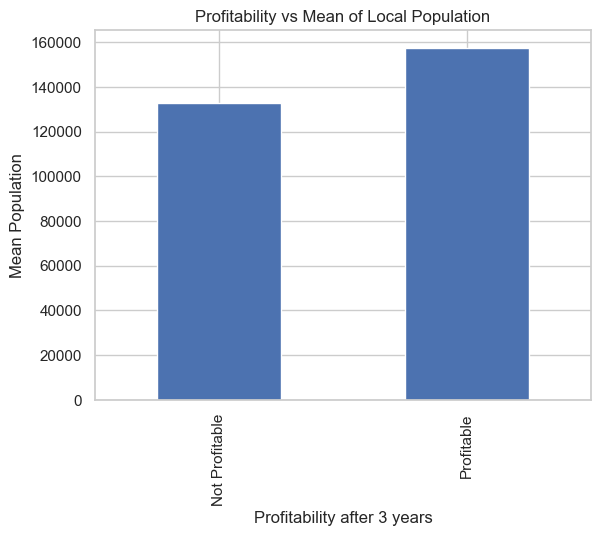

In [251]:
df.groupby(['year_3_profit'])['local_pop'].mean().plot(kind = 'bar')
plt.title("Profitability vs Mean of Local Population")
plt.xlabel("Profitability after 3 years")
plt.ylabel("Mean Population")
plt.xticks([0,1], ['Not Profitable', 'Profitable'])

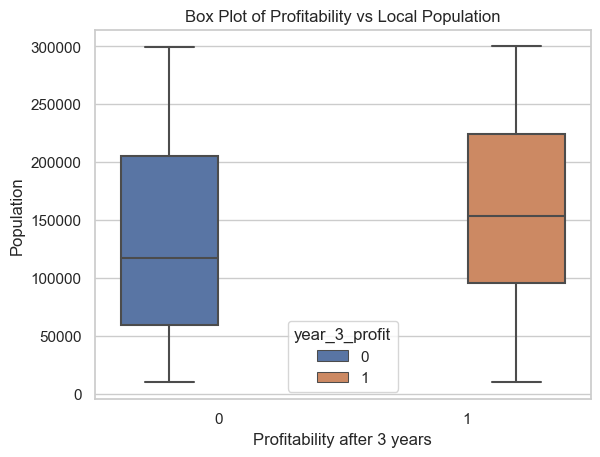

In [252]:
sns.boxplot(x='year_3_profit', y='local_pop', data=df, hue='year_3_profit')
plt.title("Box Plot of Profitability vs Local Population")
plt.xlabel("Profitability after 3 years")
plt.ylabel("Population")
plt.show()

In [253]:
# Creating the dataframe for profitable restaurants

df_profitable = df[df['year_3_profit'] == 1]
df_profitable.head(10)

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded
0,38195,1,125567.0,0.0,6.4,3,0,1
1,12324,1,105571.0,0.0,5.3,16,1,2
3,41435,1,169028.0,0.0,6.0,5,1,1
4,24969,1,153472.0,0.0,4.5,4,0,1
5,38255,1,197654.0,0.0,7.6,5,1,1
6,26925,1,265647.0,0.0,7.2,2,1,2
7,91321,1,131662.0,0.0,6.3,20,1,1
8,20900,1,175574.0,0.0,6.8,4,1,1
9,11136,1,22738.0,0.0,33.5,11,1,2
10,40385,1,44333.0,0.0,15.9,11,1,1


In [254]:
# Mean and Standard Deviation of Local Population for Profitable Restaurants
profitable_pop_mean = round(df_profitable['local_pop'].mean())
profitable_pop_std = round(df_profitable['local_pop'].std())
print(f"Mean Local Population of Profitable restaurants: {profitable_pop_mean} with Standard Deviation: {profitable_pop_std}")

Mean Local Population of Profitable restaurants: 157515 with Standard Deviation: 79520


In [255]:
pop_lower_range = profitable_pop_mean - profitable_pop_std
pop_upper_range = profitable_pop_mean + profitable_pop_std

print(f"Range of Local Population for Profitability: {pop_lower_range} to {pop_upper_range}")

Range of Local Population for Profitability: 77995 to 237035


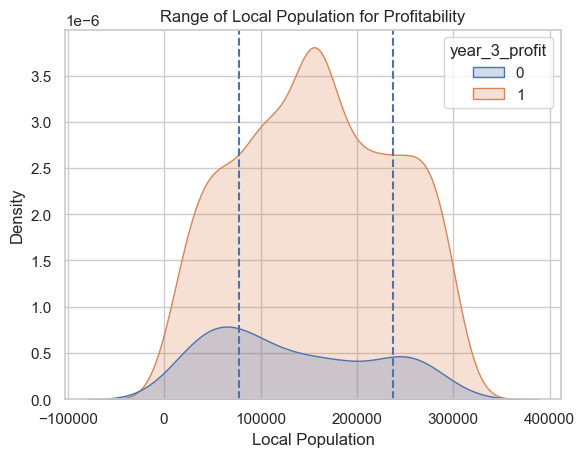

In [256]:
sns.kdeplot(data=df, x='local_pop', hue='year_3_profit', fill=True)
plt.axvline(pop_lower_range, linestyle='dashed', label='Lower Bound')
plt.axvline(pop_upper_range, linestyle='dashed', label='Upper Bound')
plt.xlabel('Local Population')
plt.ylabel('Density')
plt.title('Range of Local Population for Profitability')
plt.show()

**Observations:**
- _New restaurants at locations having local population in the range of 78k to 238k can be profitable_ 
- _The bar plot indicates that the average local population is more for profitable restaurants._ 
- _The box plot represents that the median local population of profitable restaurants is higher than that of not-profitable._ 

#### Relationship between Profitability and Nearest FGH location

([<matplotlib.axis.XTick at 0x7fc492d31670>,
 [Text(0, 0, 'Not Profitable'), Text(1, 0, 'Profitable')])

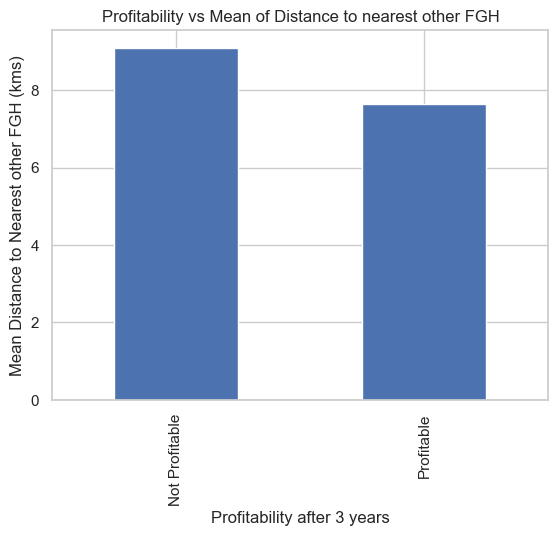

In [257]:
df.groupby(['year_3_profit'])['nearest_fgh'].mean().plot(kind = 'bar')
plt.title("Profitability vs Mean of Distance to nearest other FGH")
plt.xlabel("Profitability after 3 years")
plt.ylabel("Mean Distance to Nearest other FGH (kms)")
plt.xticks([0,1], ['Not Profitable', 'Profitable'])

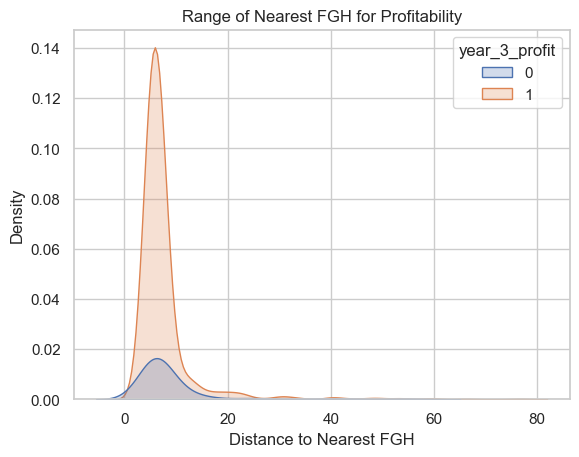

In [258]:
sns.kdeplot(data=df, x='nearest_fgh', hue='year_3_profit', fill=True)
plt.xlabel('Distance to Nearest FGH')
plt.ylabel('Density')
plt.title('Range of Nearest FGH for Profitability')
plt.show()

In [259]:
nearest_fgh_profit_mean = round(df_profitable['nearest_fgh'].mean(),2)
print(f"Mean Distance to nearest other FGH (Profitable): {nearest_fgh_profit_mean}")

Mean Distance to nearest other FGH (Profitable): 7.65


In [260]:
nearest_fgh_loss_mean = round(df[df['year_3_profit'] == 0]['nearest_fgh'].mean(),2)
print(f"Mean Distance to nearest other FGH (Not-Profitable): {nearest_fgh_loss_mean}")

Mean Distance to nearest other FGH (Not-Profitable): 9.1


**Observations:**
- _The mean distance of the nearest other FGH restaurant is less for profitable relative to not-profitable_
- _The proximity of the Profitable restaurants to the nearest other FGH is less_

#### Relationship between Profitability and Highway

([<matplotlib.axis.XTick at 0x7fc484a2ed30>,
 [Text(0, 0, 'Not Profitable'), Text(1, 0, 'Profitable')])

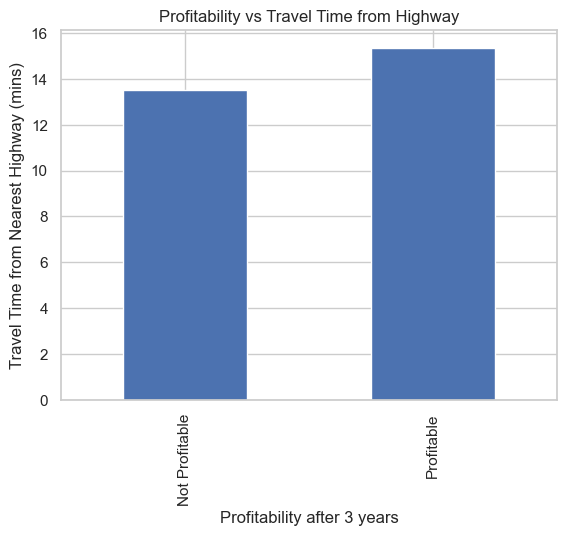

In [261]:
df.groupby(['year_3_profit'])['highway'].mean().plot(kind = 'bar')
plt.title("Profitability vs Travel Time from Highway")
plt.xlabel("Profitability after 3 years")
plt.ylabel("Travel Time from Nearest Highway (mins)")
plt.xticks([0,1], ['Not Profitable', 'Profitable'])

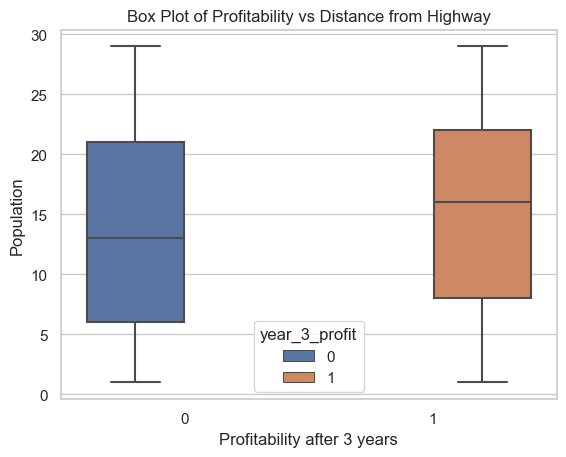

In [262]:
sns.boxplot(x='year_3_profit', y='highway', data=df, hue='year_3_profit')
plt.title("Box Plot of Profitability vs Distance from Highway")
plt.xlabel("Profitability after 3 years")
plt.ylabel("Population")
plt.show()

In [263]:
profitable_highway_mean = round(df_profitable['highway'].mean(), 2)
print(f"Average Travel Time from Highway to Profitable restaurants: {profitable_highway_mean} mins")

Average Travel Time from Highway to Profitable restaurants: 15.36 mins


In [264]:
not_profitable_highway_mean = round(df[df['year_3_profit'] == 0]['highway'].mean(), 2)
print(f"Average Travel Time from Highway to Not-Profitable restaurants: {not_profitable_highway_mean} mins")

Average Travel Time from Highway to Not-Profitable restaurants: 13.5 mins


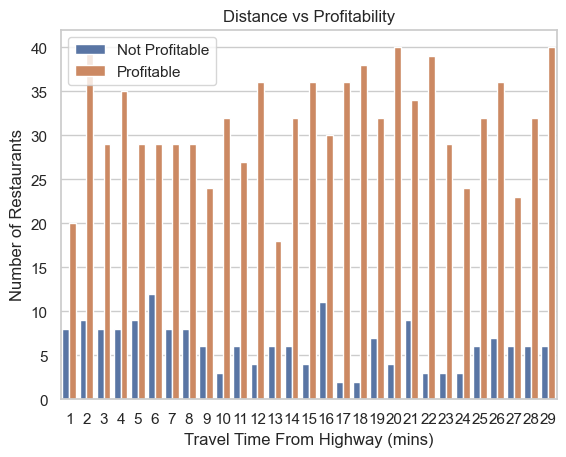

In [265]:
sns.countplot(data = df, x = 'highway', hue = 'year_3_profit')
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.title("Distance vs Profitability")
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

#### Binning

In [266]:
# Creating a copy and binning the values of travel time in 5 mins range

df_highway_bin = df.copy()
df_highway_bin.loc[ df_highway_bin['highway'] < 5, 'highway_bin' ] = 'Less than 5 mins'
df_highway_bin.loc[ ((df_highway_bin['highway'] >= 5) & (df_highway_bin['highway'] < 10)), 'highway_bin' ] = '[5-10) minutes'
df_highway_bin.loc[ ((df_highway_bin['highway'] >= 10) & (df_highway_bin['highway'] < 15)), 'highway_bin' ] = '[10-15) minutes'
df_highway_bin.loc[ ((df_highway_bin['highway'] >= 15) & (df_highway_bin['highway'] < 20)), 'highway_bin' ] = '[15-20) minutes'
df_highway_bin.loc[ ((df_highway_bin['highway'] >= 20) & (df_highway_bin['highway'] < 25)), 'highway_bin' ] = '[20-25) minutes'
df_highway_bin.loc[ ((df_highway_bin['highway'] >= 25) & (df_highway_bin['highway'] < 30)), 'highway_bin' ] = '[25-30) minutes'
df_highway_bin


,location,year_3_profit,local_pop,competitors,nearest_fgh,highway,drivethru_encoded,hours_encoded,highway_bin
0,38195,1,125567.0,0.0,6.4,3,0,1,Less than 5 mins
1,12324,1,105571.0,0.0,5.3,16,1,2,[15-20) minutes
2,79567,0,104591.0,0.0,6.3,6,0,1,[5-10) minutes
3,41435,1,169028.0,0.0,6.0,5,1,1,[5-10) minutes
4,24969,1,153472.0,0.0,4.5,4,0,1,Less than 5 mins
...,...,...,...,...,...,...,...,...,...
1085,23969,0,277169.0,0.0,4.5,22,0,0,[20-25) minutes
1086,72777,1,17805.0,0.0,14.4,15,1,1,[15-20) minutes
1087,14249,1,231969.0,0.0,5.2,22,0,2,[20-25) minutes
1088,91866,1,53674.0,0.0,9.4,9,1,1,[5-10) minutes


In [267]:
df_highway_bin.groupby(['highway_bin'])['location'].size()

highway_bin
Less than 5 mins    157
[10-15) minutes     170
[15-20) minutes     198
[20-25) minutes     188
[25-30) minutes     194
[5-10) minutes      183
Name: location, dtype: int64

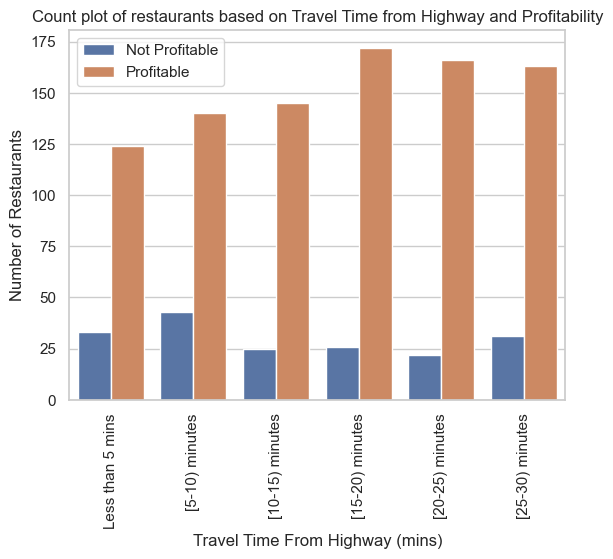

In [268]:
sns.countplot(data = df_highway_bin, x = 'highway_bin', hue = 'year_3_profit', order= ['Less than 5 mins','[5-10) minutes', '[10-15) minutes', '[15-20) minutes', '[20-25) minutes', '[25-30) minutes', ])
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.title("Count plot of restaurants based on Travel Time from Highway and Profitability")
plt.xticks(rotation=90)
plt.legend(loc = 'best', labels = ['Not Profitable', 'Profitable'])

Exploring 'competitors' factor

In [269]:
df_highway_bin.groupby(['competitors','year_3_profit','highway_bin'])['location'].count()

competitors  year_3_profit  highway_bin     
0.0          0              Less than 5 mins     31
                            [10-15) minutes      23
                            [15-20) minutes      24
                            [20-25) minutes      21
                            [25-30) minutes      27
                            [5-10) minutes       39
             1              Less than 5 mins    116
                            [10-15) minutes     136
                            [15-20) minutes     152
                            [20-25) minutes     149
                            [25-30) minutes     148
                            [5-10) minutes      120
1.0          0              Less than 5 mins      2
                            [10-15) minutes       2
                            [15-20) minutes       2
                            [20-25) minutes       1
                            [25-30) minutes       4
                            [5-10) minutes        4
             1     

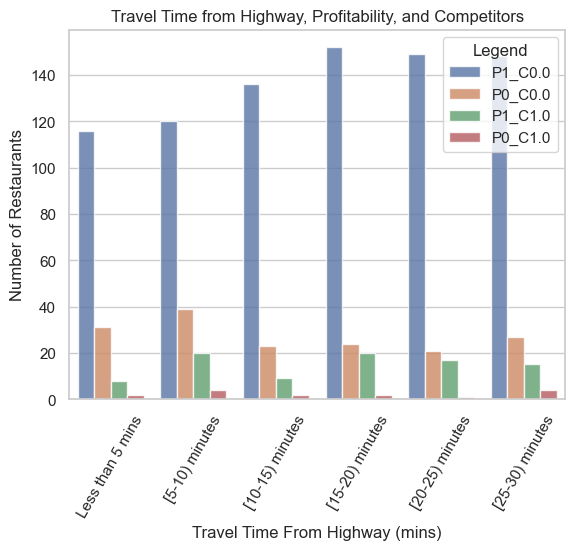

In [270]:
# New column to combine 'year_3_profit' and 'competitors' 
df_highway_bin['profit_and_competitors'] = 'P' + df_highway_bin['year_3_profit'].astype(str) + '_C' + df_highway_bin['competitors'].astype(str)


# Creating a countplot with the hue as the newly created column
sns.countplot(data=df_highway_bin, x='highway_bin', hue='profit_and_competitors', order=['Less than 5 mins', '[5-10) minutes', '[10-15) minutes', '[15-20) minutes', '[20-25) minutes', '[25-30) minutes'], alpha=0.8)
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.title("Travel Time from Highway, Profitability, and Competitors")
plt.xticks(rotation=60)
plt.legend(title='Legend')

plt.show()

**Observations:**
- _We can see that in the locations having 0 competitors within 2 kms radius, the number of restaurants making profit is quite high. Due to the absence of other options, people are willing to travel the distance for certain time and visit the FGH restaurants._
- _Few restaurants are still not profitable even though there is no competition. There is an option to improve the business here by understanding the challeneges being faced in such locations._

In [271]:
df_24hours_profit = df_highway_bin[(df_highway_bin.year_3_profit == 1) & (df_highway_bin.hours_encoded == 2)]
df_Ext_hours_profit = df_highway_bin[(df_highway_bin.year_3_profit == 1) & (df_highway_bin.hours_encoded == 1)]
df_Reg_hours_profit = df_highway_bin[(df_highway_bin.year_3_profit == 1) & (df_highway_bin.hours_encoded == 0)]

print(f"Time to 24 hours service restaurant from highway (Profitable):\n{df_24hours_profit['highway_bin'].value_counts(normalize = True)}")
print(f"\nTime to Extended service restaurant from highway (Profitable):\n{df_Ext_hours_profit['highway_bin'].value_counts(normalize = True)}")
print(f"\nTime to Regular service restaurant from highway (Profitable):\n{df_Reg_hours_profit['highway_bin'].value_counts(normalize = True)}")

Time to 24 hours service restaurant from highway (Profitable):
[20-25) minutes     0.188679
[25-30) minutes     0.181132
[15-20) minutes     0.169811
[10-15) minutes     0.162264
[5-10) minutes      0.158491
Less than 5 mins    0.139623
Name: highway_bin, dtype: float64

Time to Extended service restaurant from highway (Profitable):
[20-25) minutes     0.188377
[15-20) minutes     0.186373
[25-30) minutes     0.182365
[5-10) minutes      0.160321
[10-15) minutes     0.148297
Less than 5 mins    0.134269
Name: highway_bin, dtype: float64

Time to Regular service restaurant from highway (Profitable):
[15-20) minutes     0.232877
[10-15) minutes     0.191781
[25-30) minutes     0.164384
[20-25) minutes     0.150685
Less than 5 mins    0.136986
[5-10) minutes      0.123288
Name: highway_bin, dtype: float64


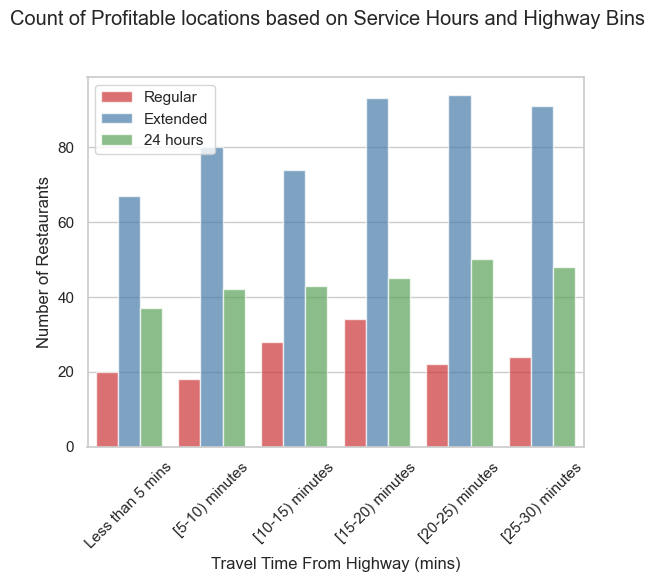

In [272]:
# Concatenate the DataFrames
concatenated_df = pd.concat([df_24hours_profit, df_Ext_hours_profit, df_Reg_hours_profit])

# Order of highway bins
order = ['Less than 5 mins', '[5-10) minutes', '[10-15) minutes', '[15-20) minutes', '[20-25) minutes', '[25-30) minutes']

# Create a countplot with 'hue' for both 'hours_encoded' and 'year_3_profit'
sns.countplot(data=concatenated_df, x='highway_bin', hue='hours_encoded', order=order, palette='Set1', alpha=0.7)
plt.xlabel("Travel Time From Highway (mins)")
plt.ylabel("Number of Restaurants")
plt.suptitle("Count of Profitable locations based on Service Hours and Highway Bins", y=1.02)
plt.xticks(rotation = 45)
plt.legend(loc = 'best', labels = ['Regular','Extended','24 hours'])
plt.show()

- _Profitable FGH restaurants are actually far from the highways which is contradictory to our general expectation._
- _Among the Profitable FGH restaurant locations, majority of them are atleast 15 mins from highway. Count of profitable locations less than 15 mins from highway is low. This could be because of a lot of factors such as availability of other alternate options, geographical constraints etc. This observation is **irrespective of the Service Hours** being offered._

- _The profitable restaurants farther from highway could be catering to local population and as we saw, due to less competition these restaurants could be thriving._ 

# Summary and  Business Recommendations

## Summary
1. Data Validation was perfomed to check the sanity of data and get basic information. Missing values and data inconsistency were addressed using appropiate Imputing techniques.


2. EDA was performed to get an exhaustive understanding of the dataset that revealed few key points as follows:

        a) About 83% of restaurants are profitable "hinting class imbalance" in the dataset.
        b) More than 90% of the restaurants do not have any competitors within 2kms radius.

3. Label Encoding and Ordinal Encoding were done to convert catgeorical columns to numerical. Outliers were treated with suitable methods in order to minimize the effect on model's performance.

4. Transformation and Scaling such as PowerTransform, StandardScaler were used to create data values suitable for ML algorithms. 

5. SMOTE technique was introduced to address the problem of class imbalance and improve model's ability to predict output. 

6. This is a **Classification** problem since the requirement is to predict whether a new location will be profitable/not.

7. Logistic Regression, Support Vector Classifier, Random Forest Classifier models were developed. 

8. KPI : Accuracy and Precision were compared among the 3 models and **RF classifier** outperformed the other 2 by achieving better Cross-Validation score, precision and 79% accuracy. 

9. The top 3 features of importance from the model:

        a) Local Population
        b) Travel time from nearest Highway
        c) Distance to the nearest neighbouring FGH restaurant.
10. Analysis was done to draw inference on how the key features affect the profitability of a restaurant.
        


### Business Recommendation

Use **Random Forest Classifier** model to predict profitability of a new restaurant after 3 years. The model needs to be finetuned at regular intervals and when the data is updated to get the most optimal performance. 

Below are the suggestions to business:

**1. Focus on locations with larger local population.**

- The franchise should consider opening new restaurants in areas with **high population density**, generally more than 157.5k that is within a 30 minute travel time. This is because the average local population of profitable restaurants were observed to be higher than not-profitable locations. 

**2. Proximity to other FGH restaurant**

- The proximity of the Profitable restaurants to the nearest other FGH is close. The mean distance was 7.6 km. It suggests that opening new FGH locations near existing ones might positively impact the profitability. 

**3. Explore regions with limited competitors**
- Restaurants with **no competitors** within 2kms are **thriving and profitable**. Location of new restaurants could be planned this way, so that the FGH franchise could be the **first** in business at such locations which leads to **larger customer acquisition/base**. 
- The franchise also must look upon **improving business** at locations that are not profitable even though there are no competitors, evaluate and address the pain points of such locations in order to make them profitable. 

**4. Locations 15mins+ from highway**
- Contradictory to the general expectation, FGH restaurants that are far from the highways are profitable. So, the franchise can consider opening new locations that are **atleast 15 mins from the highway** and at locations where there is limited competition. 

**5. Franchise to decide on Drive-Through and Service Hours**
- The service hours was **not a prominent factor** in determining the profitability. All 3 types were **performing equally good** and due to missing values, the result was a bit **inconclusive**. The drive-thru distibution against profitability was almost equal. Since, the **operational costs** based on the type of service hours is **unavailable**, we can recommend the **franchise to take the call** while setting up restaurant in new locations based on the local regulations. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation